# For PCA final figure

In [25]:
import numpy as np
import pandas as pd
from pandas import DataFrame as df
import matplotlib.pyplot as plt
import matplotlib
import analysis_pca

Ts = 1000
data_path = r'/home/jb/Desktop/work/python_code'
save_path = r'/home/jb/Desktop/work/figure'

In [26]:
#For FN PCA

import pre_processing

ppss = pre_processing.pre_processing(Ts, data_path, save_path)
[final_cat, data_cat, val_cat, dur_cat, rejectedXY_cat] = ppss.datasorting_orientation(1)

apca = analysis_pca.analysis_pca(Ts, data_cat, save_path)
data_cat_sm = apca.smoothing_data()
PCA_total = apca.pca_analy(data_cat_sm)


# PCA to PCA

PCA_total2 = apca.pca_to_pca(PCA_total, 4)

Dimensions: 1, Variance explained: 57.01%
Dimensions: 2, Variance explained: 76.14%
Dimensions: 3, Variance explained: 82.16%
Dimensions: 4, Variance explained: 86.65%
Dimensions: 5, Variance explained: 89.17%
Dimensions to be reduced: 5
Dimensions: 1, Variance explained: 64.05%
Dimensions: 2, Variance explained: 78.73%
Dimensions: 3, Variance explained: 83.99%
Dimensions: 4, Variance explained: 87.57%
Dimensions: 5, Variance explained: 90.69%
Dimensions to be reduced: 4
Dimensions: 1, Variance explained: 65.68%
Dimensions: 2, Variance explained: 75.64%
Dimensions: 3, Variance explained: 80.99%
Dimensions: 4, Variance explained: 85.31%
Dimensions: 5, Variance explained: 88.71%
Dimensions to be reduced: 5
Dimensions: 1, Variance explained: 63.94%
Dimensions: 2, Variance explained: 75.89%
Dimensions: 3, Variance explained: 81.82%
Dimensions: 4, Variance explained: 85.62%
Dimensions: 5, Variance explained: 88.53%
Dimensions to be reduced: 5
Dimensions: 1, Variance explained: 64.24%
Dimens

In [27]:
# PCA to PCA

pca_data = []
for a in range(8):
    temp = PCA_total[a]['p']
    temp = temp[:,:4]
    pca_data.append(temp)

pca_data = np.array(pca_data)
pca_data = np.concatenate(pca_data, axis = 1)

In [28]:
# PCA to total data

data_cat_sm22 = np.concatenate(data_cat_sm, axis=0)
PCA_total0 = apca.pca_analy(data_cat_sm22)

Dimensions: 1, Variance explained: 59.64%
Dimensions: 2, Variance explained: 73.91%
Dimensions: 3, Variance explained: 80.97%
Dimensions: 4, Variance explained: 85.10%
Dimensions: 5, Variance explained: 87.76%
Dimensions to be reduced: 5


## For behavior task figure

In [29]:
ori_templet=np.load('ori_templet.npy', allow_pickle=True)

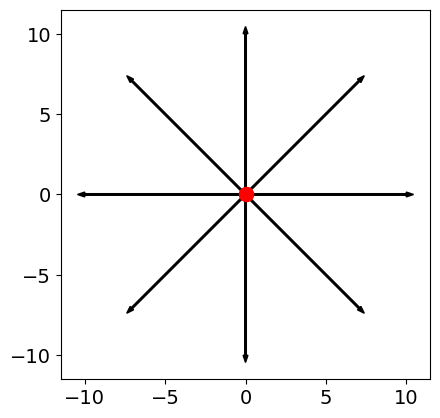

In [30]:
for a in range(8):

    plt.arrow(
        x=0, y=0,
        dx=ori_templet[a, 0], dy=ori_templet[a, 1],
        width=0.1,
        head_width=0.3,
        overhang=0,
        facecolor='black')

plt.axis('square')

plt.scatter([0, 0], [0, 0], s=100, color='r')
plt.savefig('raw.jpg', dpi=300)

## For raw data

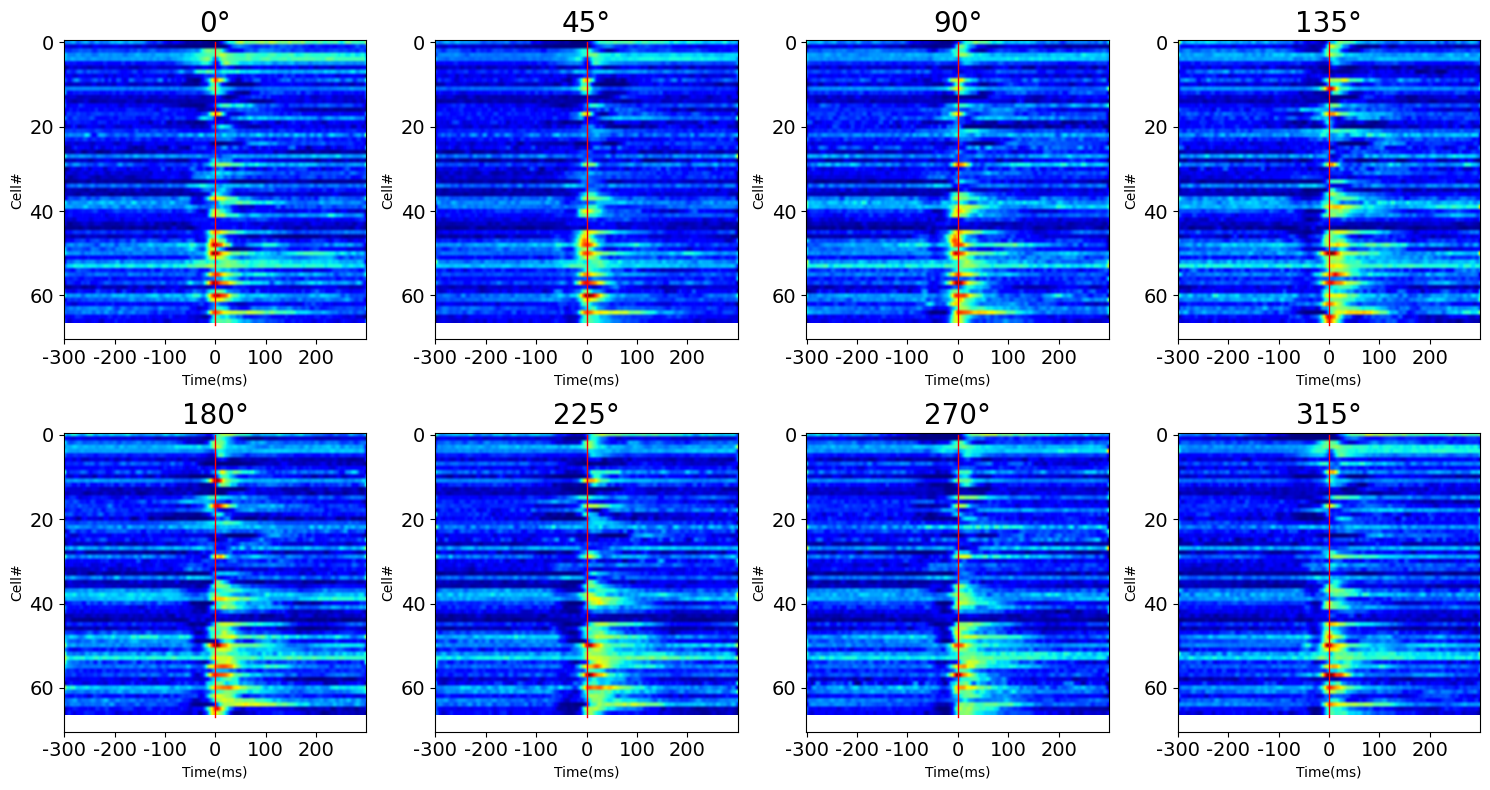

In [31]:
# Plotting raw data of each orientation

# label_ori = ['Right', 'Up right', 'Up', 'Up left',
#              'Left', 'Down left', 'Down', 'Down right']

import math

label_ori = []
for a in np.linspace(0, 360, 9):
    ss = math.trunc(a)
    temp = f'{ss}\N{DEGREE SIGN}'
    label_ori.append(temp)

label_ori = np.array(label_ori)
    
fig, axes = plt.subplots(2, 4, figsize=(15, 8))

# for a in range(8):
c = 0
for a in range(8): # right to down right, anticlock-wise
    ax = axes[a // 4, a % 4]  # Determine the subplot location
    ax.imshow(data_cat_sm[a], aspect='auto', cmap='jet', origin='upper')  # Display the data
    ax.plot([300, 300], [0, len(data_cat_sm[0])], 'r', linewidth=1)  # Red vertical line
    ax.set_xticks(np.arange(0, 600, 100))  # Set X ticks
    ax.set_xticklabels(np.arange(-300, 300, 100))  # Set X tick labels
    ax.set_title(label_ori[c], size=20)  # Set the title for each subplot
    ax.set_ylabel("Cell#")  # Set Y-axis label
    ax.set_xlabel("Time(ms)")  # Set X-axis label
    c = c + 1

plt.tight_layout()

plt.savefig('raw.jpg', dpi=300)
plt.show()

## For PCA results

In [32]:
cmap = matplotlib.colormaps.get_cmap("Set1")
C_list_p = cmap( np.linspace(0.0, 1.0, 4) ) # extract 20 colors from cmap

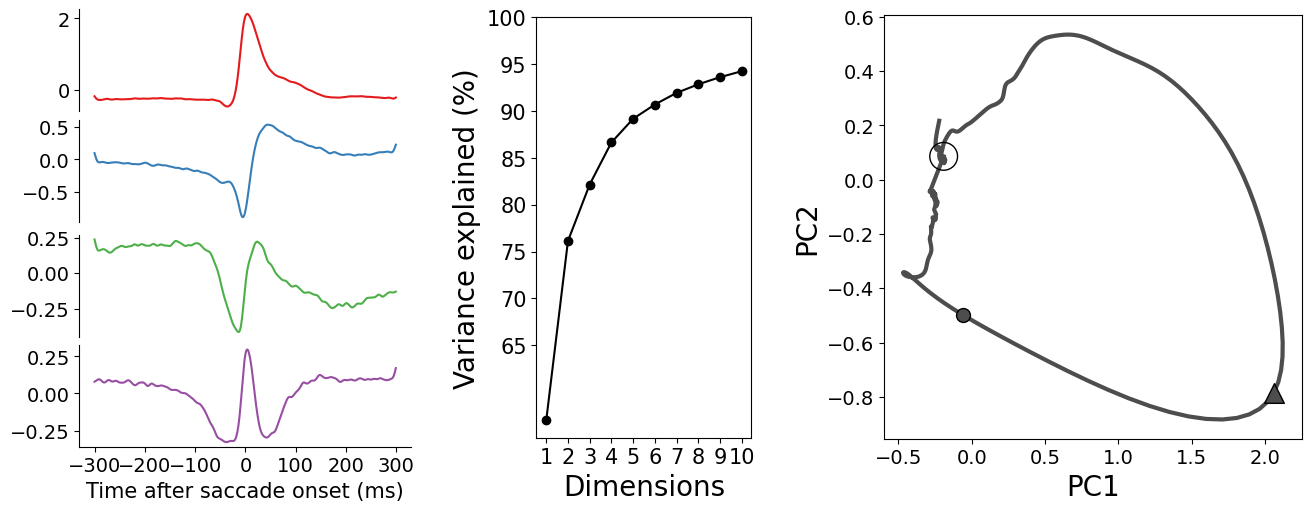

In [33]:
# Pretty figures0 for total data pca

from scipy.ndimage import gaussian_filter1d

win = 1  # timewindow (ms), if sampling rate is 1000hz, win=10 is 10ms

fig = plt.figure(constrained_layout=True,figsize=(13,5))
subfigs = fig.subfigures(1, 3, wspace=0.07, width_ratios=[4, 3, 5])

# color_v = [0.5, 0.8, 0.5]
color_v = C_list_p[0]
ori = 0

#pca
subfigs[2].subplots(1, 1)
   
temp_PC = PCA_total0['p'].T

s_temp1 = gaussian_filter1d(temp_PC[0], win)
s_temp2 = gaussian_filter1d(temp_PC[1], win)
s_temp3 = gaussian_filter1d(temp_PC[2], win)

X = s_temp1[0:600]
Y = s_temp2[0:600]
Z = s_temp3[0:600]

# plt.scatter(X, Y, s=10, color=C_list[ori], marker='o')
plt.plot(X[0:600], Y[0:600], linewidth=3.0, color=[0.3, 0.3, 0.3])
# plt.scatter(X[280], Y[280], s=200, color=[0, 0, 0], facecolors='none')
plt.scatter(X[0], Y[0], s=400, color = [0, 0, 0], facecolors='none', zorder=3)
plt.scatter(X[280], Y[280], s=100, color=[0.3, 0.3, 0.3], facecolors=[0.3, 0.3, 0.3], edgecolors='black', zorder=3)
plt.scatter(X[300], Y[300], marker='^', s=200, color = [0.3, 0.3, 0.3], edgecolors='black', zorder=3)
    
plt.xlabel('PC1', fontsize=20)
plt.ylabel('PC2', fontsize=20)
    # zlabel('PC3')

#variance explained
subfigs[1].subplots(1, 1)

dd = PCA_total[ori]['dd']

# Get the explained variance ratio and cumulative sum
var_explained = np.cumsum(dd) * 100

# Plot variance explained
plt.plot(np.arange(1,11, 1), var_explained[:10], 'o-', label="Cumulative variance explained", color = 'black')
plt.xlabel('Dimensions', fontsize=20)
plt.ylabel('Variance explained (%)', fontsize=20)
plt.xticks(np.arange(1, 11, step=1), fontsize=15)
plt.yticks(np.arange(65, 101, step=5), fontsize=15)


subfigs[0].subplots(4, 1)

for i in range(4):  # Plot the first 4 components or up to nmode
    ax = plt.subplot(4, 1, i + 1)
    ax.plot(np.arange(-300, 300), temp_PC[i, :600], color = C_list[i])  # Assuming 600 time steps
    # ax.set_title(f'dPC {i + 1}')
    ax.axis('on')
    ax.get_xaxis().set_ticks([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    if i == 3:
        ax.spines['bottom'].set_visible(True)
        ax.get_xaxis().set_ticks(np.arange(-300,301,100))
plt.xlabel('Time after saccade onset (ms)', fontsize=15)
# fig.text(-0.03, 0.55, 'dPCs', 
#                 ha='center', 
#                 va='center', 
#                 rotation='vertical', 
#                 fontsize=15)


plt.savefig('pc0.jpg', dpi=300)

plt.show()

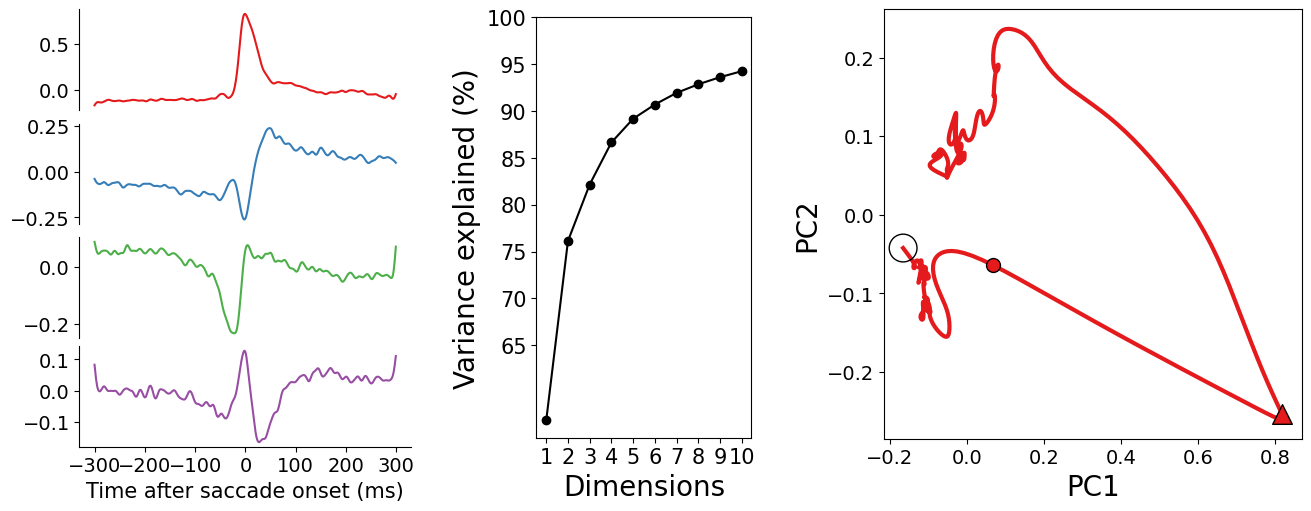

In [34]:
# Pretty figures1 for example sample

from scipy.ndimage import gaussian_filter1d

win = 1  # timewindow (ms), if sampling rate is 1000hz, win=10 is 10ms

fig = plt.figure(constrained_layout=True,figsize=(13,5))
subfigs = fig.subfigures(1, 3, wspace=0.07, width_ratios=[4, 3, 5])

# color_v = [0.5, 0.8, 0.5]
color_v = C_list_p[0]
ori = 0

#pca
subfigs[2].subplots(1, 1)
   
temp_PC = PCA_total[ori]['p'].T

s_temp1 = gaussian_filter1d(temp_PC[0], win)
s_temp2 = gaussian_filter1d(temp_PC[1], win)
s_temp3 = gaussian_filter1d(temp_PC[2], win)

X = s_temp1[0:600]
Y = s_temp2[0:600]
Z = s_temp3[0:600]

# plt.scatter(X, Y, s=10, color=C_list[ori], marker='o')
plt.plot(X[0:600], Y[0:600], linewidth=3.0, color=color_v)
# plt.scatter(X[280], Y[280], s=200, color=[0, 0, 0], facecolors='none')
plt.scatter(X[0], Y[0], s=400, color = [0, 0, 0], facecolors='none', zorder=3)
plt.scatter(X[280], Y[280], s=100, color=color_v, facecolors=color_v, edgecolors='black', zorder=3)
plt.scatter(X[300], Y[300], marker='^', s=200, color = color_v, edgecolors='black', zorder=3)
    
plt.xlabel('PC1', fontsize=20)
plt.ylabel('PC2', fontsize=20)
    # zlabel('PC3')

#variance explained
subfigs[1].subplots(1, 1)

dd = PCA_total[ori]['dd']

# Get the explained variance ratio and cumulative sum
var_explained = np.cumsum(dd) * 100

# Plot variance explained
plt.plot(np.arange(1,11, 1), var_explained[:10], 'o-', label="Cumulative variance explained", color = 'black')
plt.xlabel('Dimensions', fontsize=20)
plt.ylabel('Variance explained (%)', fontsize=20)
plt.xticks(np.arange(1, 11, step=1), fontsize=15)
plt.yticks(np.arange(65, 101, step=5), fontsize=15)


subfigs[0].subplots(4, 1)

for i in range(4):  # Plot the first 4 components or up to nmode
    ax = plt.subplot(4, 1, i + 1)
    ax.plot(np.arange(-300, 300), temp_PC[i, :600], color = C_list[i])  # Assuming 600 time steps
    # ax.set_title(f'dPC {i + 1}')
    ax.axis('on')
    ax.get_xaxis().set_ticks([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    if i == 3:
        ax.spines['bottom'].set_visible(True)
        ax.get_xaxis().set_ticks(np.arange(-300,301,100))
plt.xlabel('Time after saccade onset (ms)', fontsize=15)
# fig.text(-0.03, 0.55, 'dPCs', 
#                 ha='center', 
#                 va='center', 
#                 rotation='vertical', 
#                 fontsize=15)


plt.savefig('pc1.jpg', dpi=300)

plt.show()

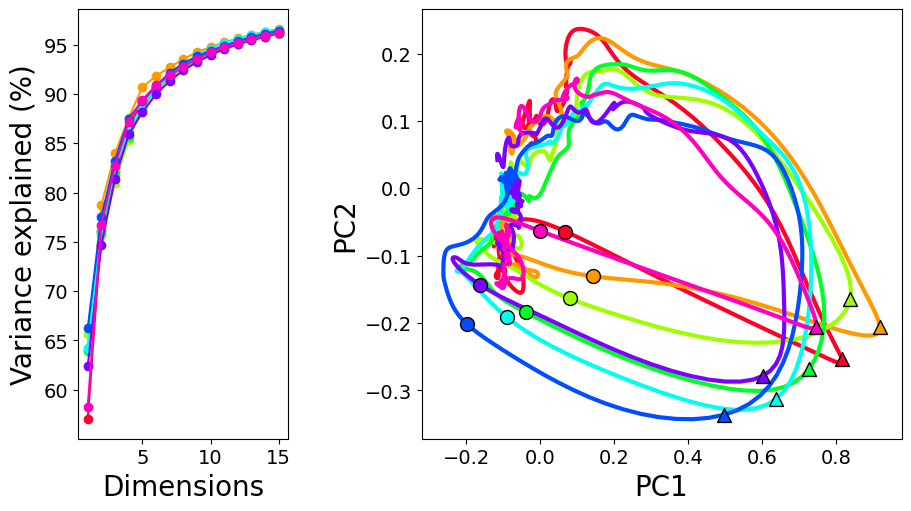

In [35]:
# Pretty figures2 for each direction
from scipy.ndimage import gaussian_filter1d
win = 1 # timewindow (ms), if sampling rate is 1000hz, win=10 is 10ms

plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)

# rainbow color

cmap = matplotlib.colormaps.get_cmap("gist_rainbow")
C_list = cmap( np.linspace(0.0, 1.0, 8) ) # extract 20 colors from cmap

# color = np.array([255, 0, 0,
#                  255, 127, 0,
#                  255, 255, 0,
#                  0, 255, 0,
#                  0, 0, 255,
#                  75, 0, 130,
#                  148, 0, 211,
#                  0, 0, 0])
# color = color / 255
# color = color.reshape(8,3)


fig = plt.figure(constrained_layout=True,figsize=(9,5))
subfigs = fig.subfigures(1, 2, wspace=0.07, width_ratios=[2, 4])

#pca
subfigs[1].subplots(1, 1)
for ori in range(8):
   
    temp_PC = PCA_total[ori]['p'].T
    
    s_temp1 = gaussian_filter1d(temp_PC[0], win)
    s_temp2 = gaussian_filter1d(temp_PC[1], win)
    s_temp3 = gaussian_filter1d(temp_PC[2], win)

    X = s_temp1[0:600]
    Y = s_temp2[0:600]
    Z = s_temp3[0:600]

    # plt.scatter(X, Y, s=10, color=C_list[ori], marker='o')
    plt.plot(X[50:500], Y[50:500], linewidth=3.0, color=C_list[ori])
    # plt.scatter(X[280], Y[280], s=200, color=[0, 0, 0], facecolors='none')
    plt.scatter(X[280], Y[280], s=100, color = C_list[ori], facecolors=C_list[ori], edgecolors='black', zorder=3)
    plt.scatter(X[300], Y[300], marker='^', s=100, color = C_list[ori], edgecolors='black', zorder=3)
    
plt.xlabel('PC1', fontsize=20)
plt.ylabel('PC2', fontsize=20)
    # zlabel('PC3')

#variance explained
subfigs[0].subplots(1, 1)
for ori in range(8): # right to down right, anticlock-wise
    dd = PCA_total[ori]['dd']

    # Get the explained variance ratio and cumulative sum
    var_explained = np.cumsum(dd) * 100

    # Plot variance explained
    plt.plot(np.arange(1,16, 1), var_explained[:15], 'o-', label="Cumulative variance explained", color = C_list[ori])
    plt.xlabel('Dimensions', fontsize=20)
    plt.ylabel('Variance explained (%)', fontsize=20)

plt.savefig('pc1.jpg', dpi=300)

plt.show()

In [36]:
temp_PC.shape

(67, 600)

In [37]:
cmap = matplotlib.colormaps.get_cmap("Set1")
C_list = cmap( np.linspace(0.0, 1.0, 8) ) # extract 20 colors from cmap

temp_g = []
for ori in range(8):
    temp_PC = PCA_total[ori]['p'].T
    temp_g.append(temp_PC[:4,:])
temp_g = np.array(temp_g)
temp_g = np.transpose(temp_g, [1,0,2])

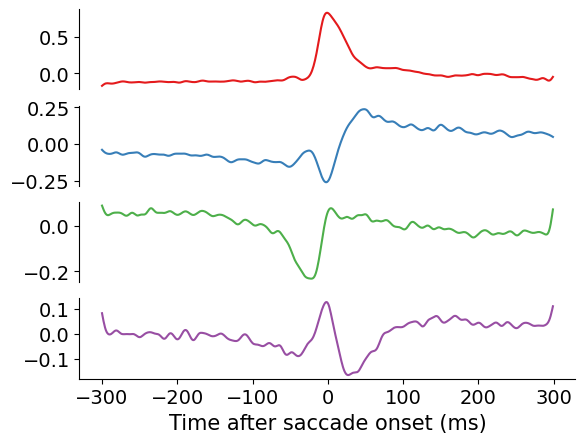

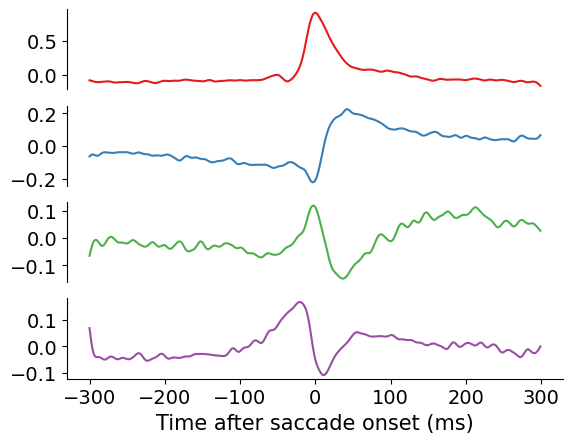

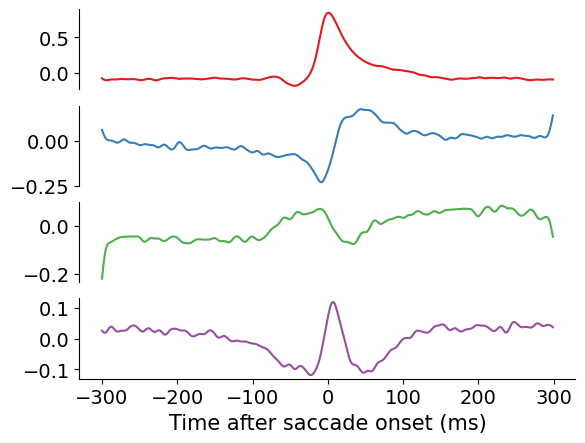

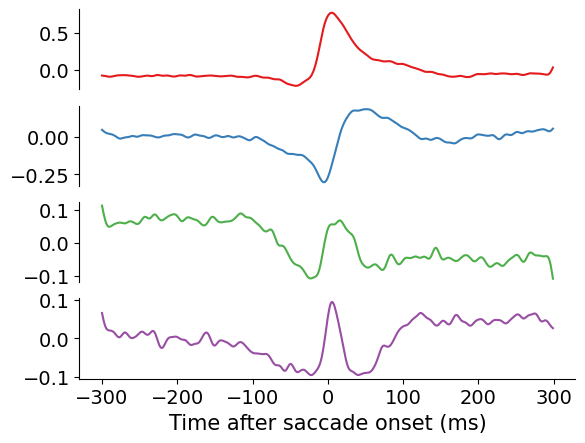

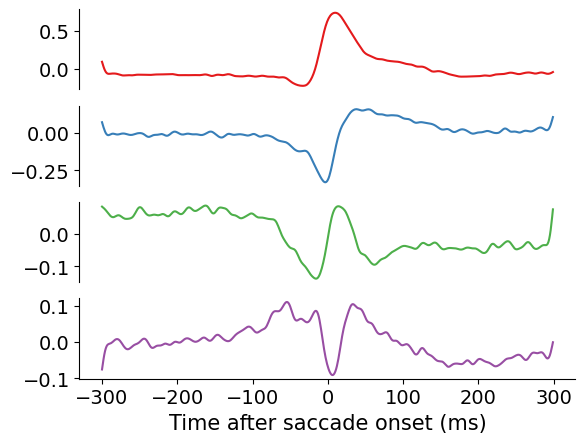

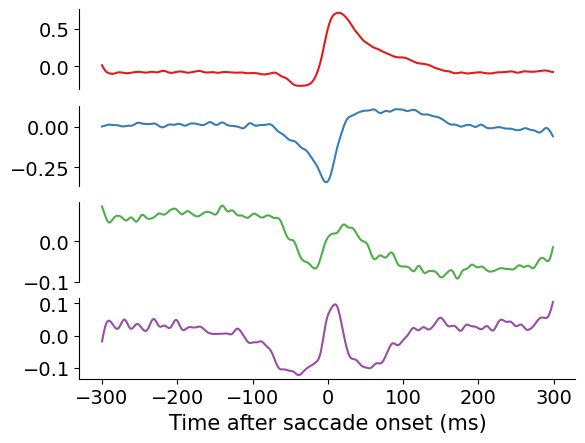

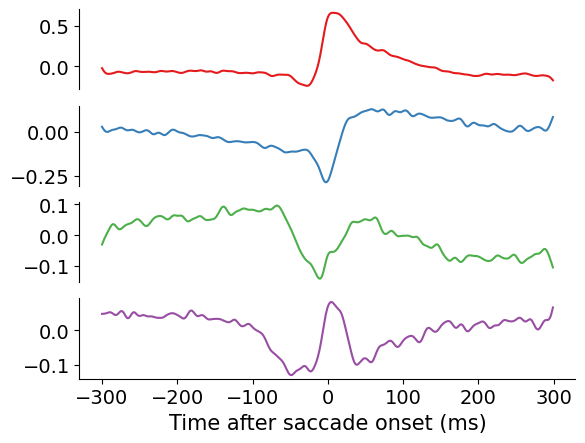

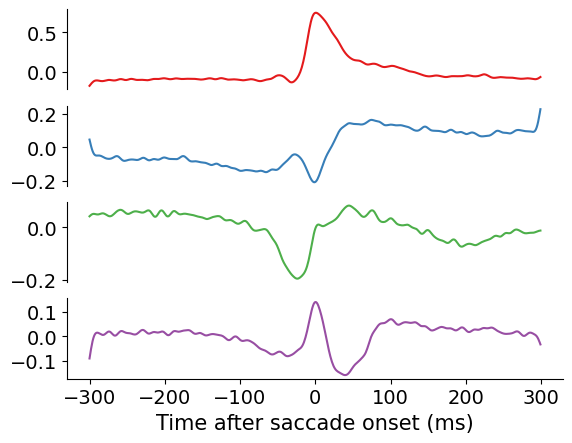

In [38]:
for ori in range(8):
    plt.figure()
    for i in range(4):  # Plot the first 4 components or up to nmode
        ax = plt.subplot(4, 1, i + 1)
        ax.plot(np.arange(-300, 300), temp_g[i, ori, :600], color = C_list[i])  # Assuming 600 time steps
        # ax.set_title(f'dPC {i + 1}')
        # ax.axis('off')
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        # if ori != 7 or i !=3:
        if i != 3:
            ax.spines['bottom'].set_visible(False)
            ax.get_xaxis().set_ticks([])
            
    plt.xlabel('Time after saccade onset (ms)', fontsize=15)
    plt.savefig(f'{ori}.jpg', dpi=300)
    # plt.xlabel('Time after saccade onset (ms)')

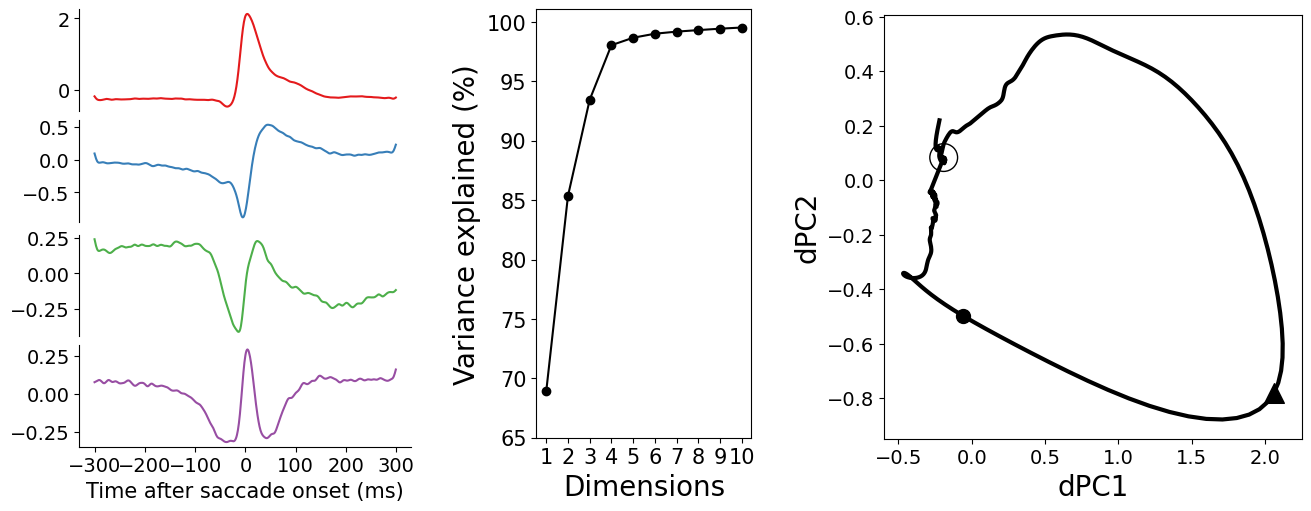

In [39]:
# Pretty figures2 for PCA to PCA

# from matplotlib.markers import CARETUP

cmap = matplotlib.colormaps.get_cmap("Set1")
C_list = cmap( np.linspace(0.0, 1.0, 8) ) # extract 20 colors from cmap

fig = plt.figure(constrained_layout=True,figsize=(13,5))
subfigs = fig.subfigures(1, 3, wspace=0.07, width_ratios=[4, 3, 5])

plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)

# Plot variance explained
subfigs[1].subplots(1, 1)
dd = PCA_total2['dd']
var_explained = np.cumsum(dd) * 100
plt.plot(np.arange(1,11, 1), var_explained[:10], 'o-', color='black')
plt.xlabel('Dimensions', fontsize=20)
plt.ylabel('Variance explained (%)', fontsize=20)
plt.xticks(np.arange(1, 11, step=1), fontsize=15)
plt.yticks(np.arange(65, 101, step=5), fontsize=15)
# plt.title('Variance Explained')

# plt.savefig('var_ex.jpg', dpi=300)
# plt.show()

# plt.savefig('var_ex.jpg', dpi=300)
# plt.show()


# Plot dPCA
subfigs[2].subplots(1, 1)

# color_v =  C_list_p[1]
color_v = [0 ,0 , 0]

from scipy.ndimage import gaussian_filter1d

win = 1 # timewindow (ms), if sampling rate is 1000hz, win=10 is 10ms
 
temp_PC2 = PCA_total2['p'].T

s_temp1 = gaussian_filter1d(temp_PC2[0], win)
s_temp2 = gaussian_filter1d(temp_PC2[1], win)
s_temp3 = gaussian_filter1d(temp_PC2[2], win)

X = s_temp1[0:600]
Y = s_temp2[0:600]
Z = s_temp3[0:600]

# plt.scatter(X, Y, s=10, color = [0, 0, 0], marker='o')
plt.plot(X, Y, linewidth=3.0, color = color_v)
plt.scatter(X[0], Y[0], s=400, color = [0, 0, 0], facecolors='none', zorder=3)
plt.scatter(X[280], Y[280], s=100, color=[0, 0, 0], facecolors=color_v, edgecolors='black', zorder=3)
plt.scatter(X[300], Y[300], marker='^', s=200, color = [0, 0, 0], facecolor = color_v, zorder=3)
plt.xlabel('dPC1', fontsize=20)
plt.ylabel('dPC2', fontsize=20)



# plt.rc('font', size=25)

# Plot the principal component time series (scores)
subfigs[0].subplots(4, 1)

for i in range(4):  # Plot the first 4 components or up to nmode
    ax = plt.subplot(4, 1, i + 1)
    ax.plot(np.arange(-300, 300), temp_PC2[i, :600], color = C_list[i])  # Assuming 600 time steps
    # ax.set_title(f'dPC {i + 1}')
    ax.axis('on')
    ax.get_xaxis().set_ticks([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    if i == 3:
        ax.spines['bottom'].set_visible(True)
        ax.get_xaxis().set_ticks(np.arange(-300,301,100))
plt.xlabel('Time after saccade onset (ms)', fontsize=15)
# fig.text(-0.03, 0.55, 'dPCs', 
#                 ha='center', 
#                 va='center', 
#                 rotation='vertical', 
#                 fontsize=15)

plt.savefig('pc2.jpg', dpi=300)

Dimensions: 1, Variance explained: 75.06%
Dimensions: 2, Variance explained: 85.13%
Dimensions: 3, Variance explained: 90.34%
Dimensions: 4, Variance explained: 93.95%
Dimensions: 5, Variance explained: 96.15%
Dimensions to be reduced: 3


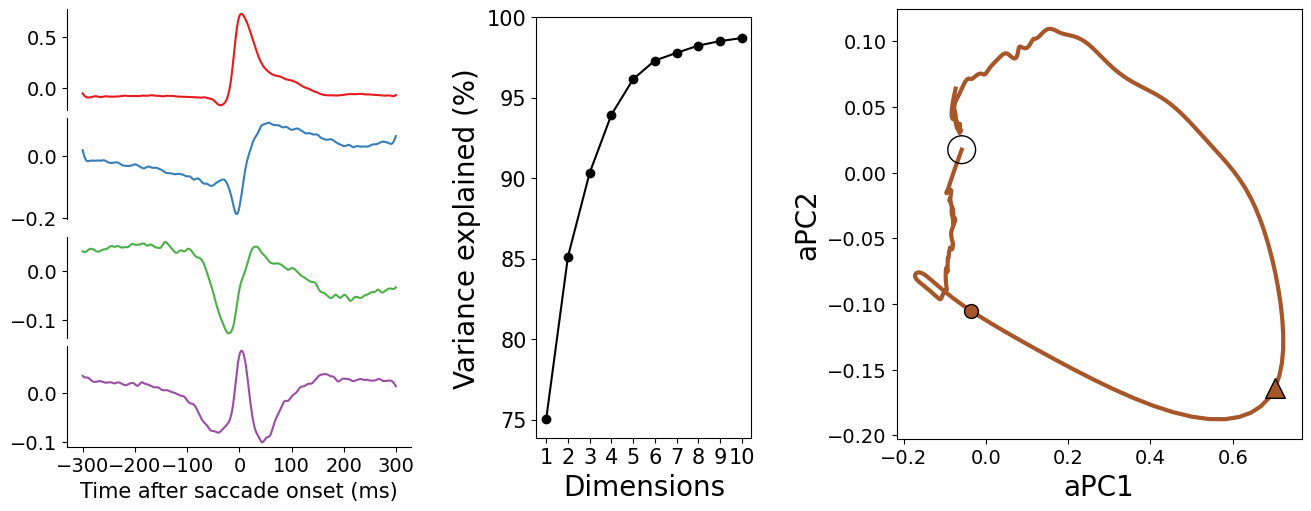

In [40]:
# Pretty figures3 for angle averaged PCA


# Angle averaged data
data = np.mean(data_cat_sm, axis=0)  # Anagle averged data
PCA_total3 = apca.pca_analy(data)  # PCA

cmap = matplotlib.colormaps.get_cmap("Set1")
C_list = cmap( np.linspace(0.0, 1.0, 8) ) # extract 20 colors from cmap

fig = plt.figure(constrained_layout=True,figsize=(13,5))
subfigs = fig.subfigures(1, 3, wspace=0.07, width_ratios=[4, 3, 5])

plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)

# Plot variance explained
subfigs[1].subplots(1, 1)
dd = PCA_total3['dd']
var_explained = np.cumsum(dd) * 100
plt.plot(np.arange(1,11, 1), var_explained[:10], 'o-', color='black')
plt.xlabel('Dimensions', fontsize=20)
plt.ylabel('Variance explained (%)', fontsize=20)
plt.xticks(np.arange(1, 11, step=1), fontsize=15)
plt.yticks(np.arange(75, 101, step=5), fontsize=15)
# plt.title('Variance Explained')

# plt.savefig('var_ex.jpg', dpi=300)
# plt.show()

# plt.savefig('var_ex.jpg', dpi=300)
# plt.show()


# Plot aPCA
subfigs[2].subplots(1, 1)

from scipy.ndimage import gaussian_filter1d

color_v =  C_list_p[2]

win = 1 # timewindow (ms), if sampling rate is 1000hz, win=10 is 10ms
 
temp_PC2 = PCA_total3['p'].T

s_temp1 = gaussian_filter1d(temp_PC2[0], win)
s_temp2 = gaussian_filter1d(temp_PC2[1], win)
s_temp3 = gaussian_filter1d(temp_PC2[2], win)

X = s_temp1[0:600]
Y = s_temp2[0:600]
Z = s_temp3[0:600]

# plt.scatter(X, Y, s=10, color = [0, 0, 0], marker='o')
plt.plot(X, Y, linewidth=3.0, color = color_v)
plt.scatter(X[0], Y[0], s=400, color = [0, 0, 0], facecolors='none', zorder=3)
plt.scatter(X[280], Y[280], s=100, color=color_v, facecolors=color_v, edgecolors='black', zorder=3)
plt.scatter(X[300], Y[300], marker='^', s=200, color = [0, 0, 0], facecolor = color_v, zorder=3)
plt.xlabel('aPC1', fontsize=20)
plt.ylabel('aPC2', fontsize=20)



# plt.rc('font', size=25)

# Plot the principal component time series (scores)
subfigs[0].subplots(4, 1)

for i in range(4):  # Plot the first 4 components or up to nmode
    ax = plt.subplot(4, 1, i + 1)
    ax.plot(np.arange(-300, 300), temp_PC2[i, :600], color = C_list[i])  # Assuming 600 time steps
    # ax.set_title(f'dPC {i + 1}')
    ax.axis('on')
    ax.get_xaxis().set_ticks([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    if i == 3:
        ax.spines['bottom'].set_visible(True)
        ax.get_xaxis().set_ticks(np.arange(-300,301,100))
plt.xlabel('Time after saccade onset (ms)', fontsize=15)
# fig.text(-0.03, 0.55, 'dPCs', 
#                 ha='center', 
#                 va='center', 
#                 rotation='vertical', 
#                 fontsize=15)

plt.savefig('pc3.jpg', dpi=300)

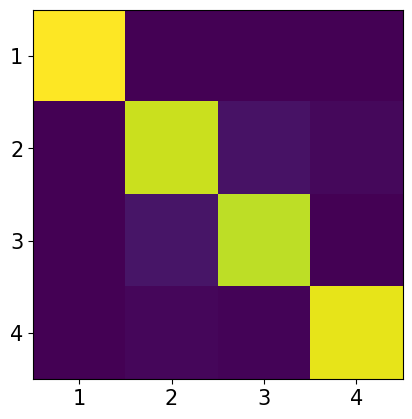

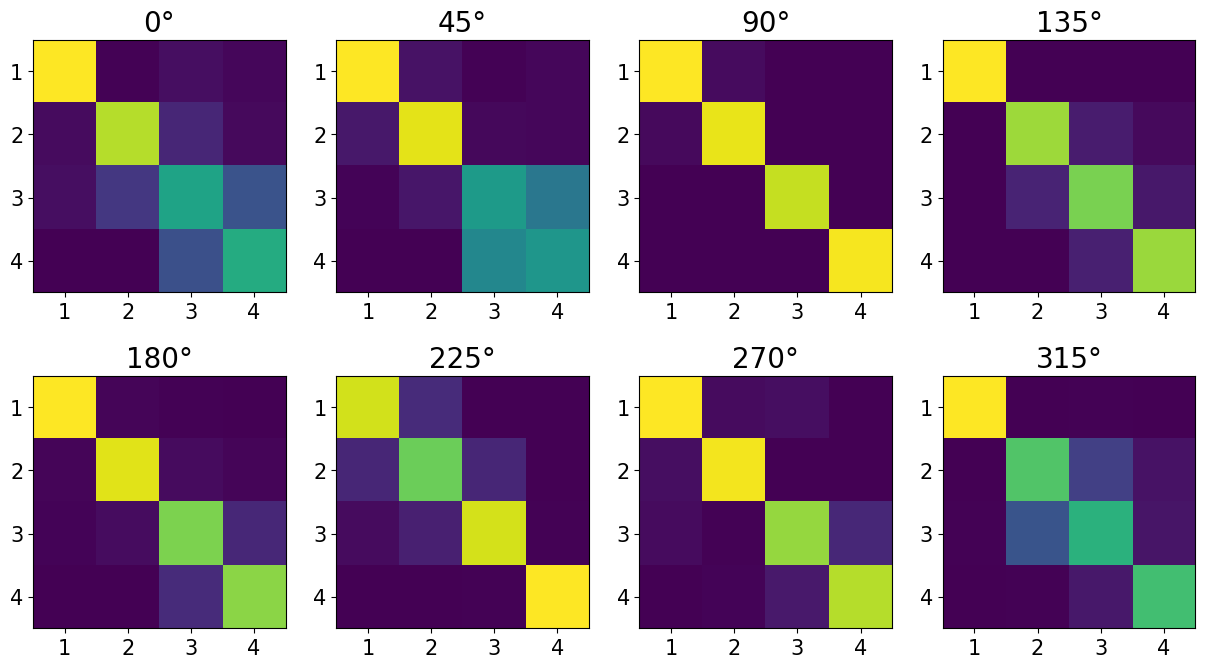

In [16]:
# R^2 between dPCA and aPCA

dpp = PCA_total2['p'].T
app = PCA_total3['p'].T

p = np.corrcoef(dpp[:4], app[:4]) ** 2
plt.imshow(p[:4,4:], cmap='viridis')
plt.xticks(np.arange(0,4,1), np.arange(1,5,1), fontsize=15)
plt.yticks(np.arange(0,4,1), np.arange(1,5,1), fontsize=15)
plt.clim(0,1)
# plt.colorbar()

plt.savefig('dp_ap.jpg', dpi=300)


import math

label_ori = []
for a in np.linspace(0, 360, 9):
    ss = math.trunc(a)
    temp = f'{ss}\N{DEGREE SIGN}'
    label_ori.append(temp)

label_ori = np.array(label_ori)

fig, axes = plt.subplots(2, 4, figsize=(15, 8))

for ori in range(8):
    pp = PCA_total[ori]['p'].T
    p = np.corrcoef(dpp[:4], pp[:4]) ** 2

    ax = axes[ori // 4, ori % 4]  # Determine the subplot location
    ax.imshow(p[:4,4:], cmap='viridis')
    ax.set_title(label_ori[ori], size=20)  # Set the title for each subplot
    ax.set_xticks(np.arange(0,4,1), np.arange(1,5,1), fontsize=15)
    ax.set_yticks(np.arange(0,4,1), np.arange(1,5,1), fontsize=15)
# fig.set_clim(0,1)
# plt.colorbar()
    
plt.savefig('dp_pp.jpg', dpi=300)

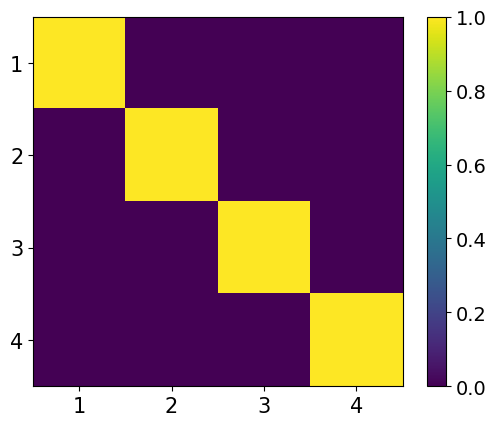

In [27]:
tpp = PCA_total0['p'].T

p = np.corrcoef(dpp[:4], tpp[:4]) ** 2
plt.imshow(p[:4,4:], cmap='viridis')
plt.xticks(np.arange(0,4,1), np.arange(1,5,1), fontsize=15)
plt.yticks(np.arange(0,4,1), np.arange(1,5,1), fontsize=15)
plt.clim(0,1)
plt.colorbar()

plt.savefig('dp_tp.jpg', dpi=300)



## Onset delay

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame as df
import matplotlib
import matplotlib.pyplot as plt
import analysis_pca

Ts = 1000
data_path = r'C:\Users\IBS\Desktop\python_code_N2'
save_path = r'C:\Users\IBS\Desktop\figures'

import pre_processing

ppss = pre_processing.pre_processing(Ts, data_path, save_path)
[final_cat, data_cat, val_cat, dur_cat, rejectedXY_cat] = ppss.datasorting_orientation(1)

val_cat = np.array(val_cat)[:,:8]
data_cat = np.array(data_cat)[:, :8]

C:\Users\IBS\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\manifold\_mds.py:632: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(


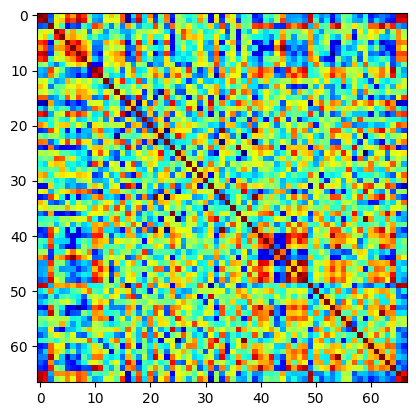

In [2]:
import preprecessing_distMat

pdm = preprecessing_distMat.preprecessing_distMat(Ts, data_cat, val_cat, save_path)
onset_delay = pdm.peak_delay(win=20)
p_t = pdm.peak_MDS(onset_delay, True)

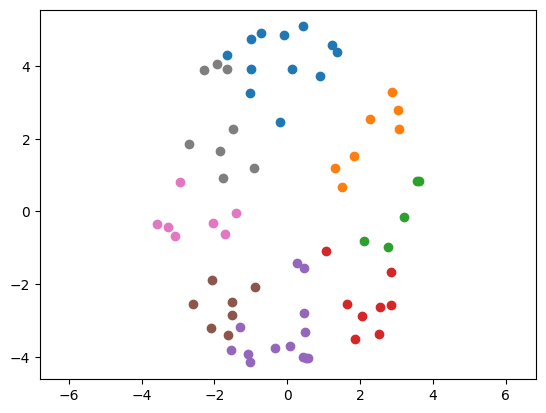

In [3]:
#Sorting cell by degree

from scipy.spatial import distance
from math import degrees

sp1 = np.argsort(p_t[:,1])[::-1][:5]
sp2 = np.argsort(np.abs(p_t[sp1, :][:, 0]))
sp = sp1[sp2[0]]

# p = p_t[sp]
cent = np.mean(p_t, axis=0)
p = [cent[0], cent[1] + 6]

deg_f = []
for a in range(len(p_t)):
    q = p_t[a]
    cos = 1-distance.cosine(p, q)
    deg = degrees(np.arccos(cos))
    if q[0] - p[0] < 0:
        deg = 360 - deg

    deg_f.append(deg)
deg_f = np.array(deg_f)

deg_idx = np.linspace(0, 360, 9) + 22.5
deg_idx = np.append(deg_idx[7], deg_idx[:7])

C_cat = []
for a in range(len(deg_idx)):
    if a == 0:
        C = np.where(np.logical_or(deg_f > deg_idx[a], deg_f <= deg_idx[a+1]))
    elif a == 7:
        C = np.where(np.logical_and(deg_f > deg_idx[a], deg_f <= deg_idx[0]))
    else:
        C = np.where(np.logical_and(deg_f > deg_idx[a], deg_f <= deg_idx[a+1]))
    C_cat.append(C)

# plotting
for a in range(8):
    plt.scatter(p_t[[C_cat[a]],0], p_t[[C_cat[a]],1])
plt.axis('equal')

plt.savefig('pizza_plot.jpg', dpi=300)

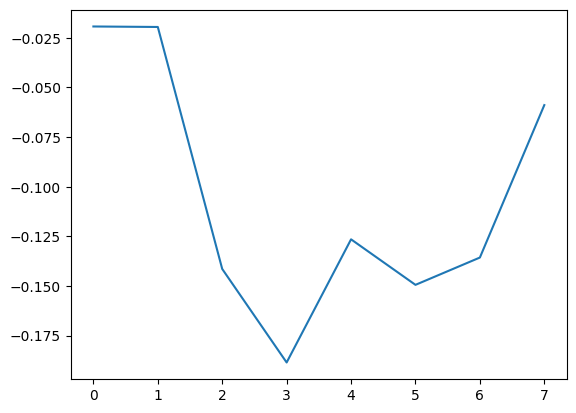

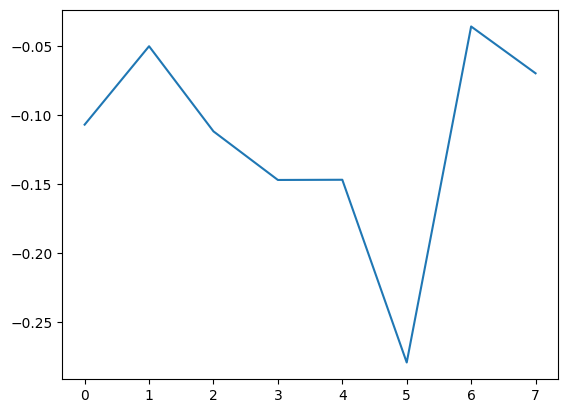

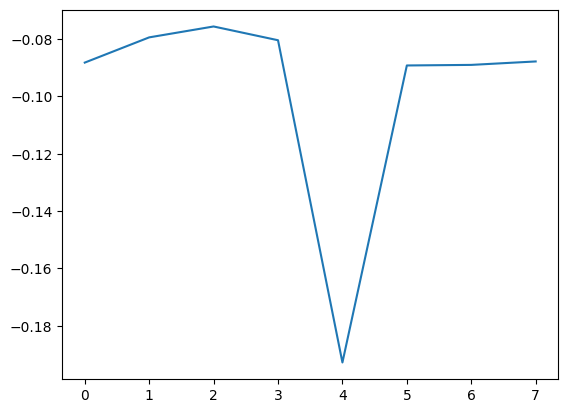

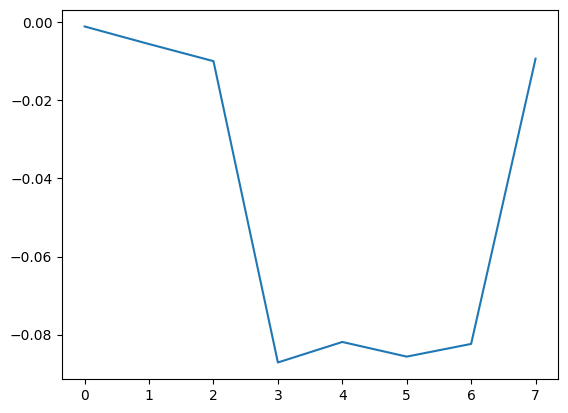

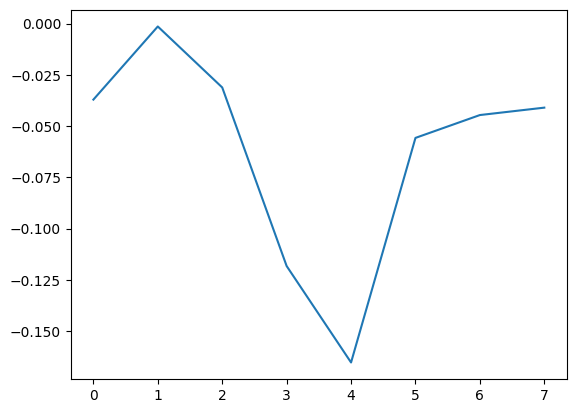

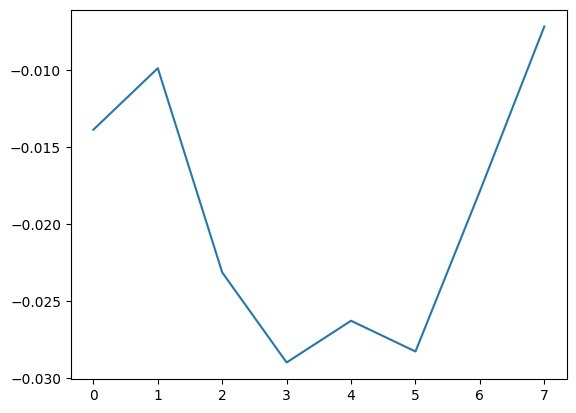

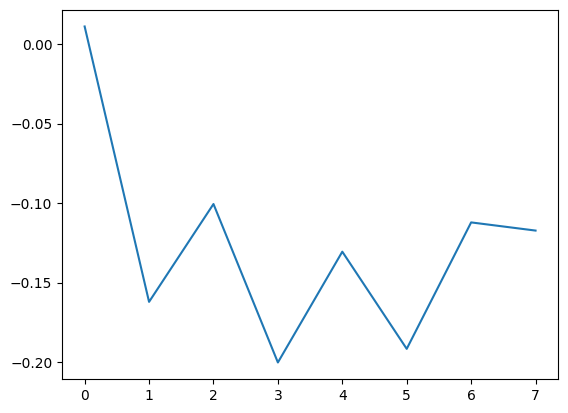

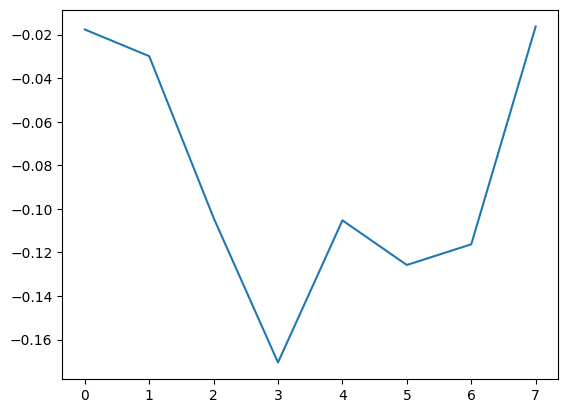

In [4]:
# Aligned data by latency

onset_delay_M = onset_delay[C_cat[0]]
for a in range(1,8):
    temp = onset_delay[C_cat[a]]
    temp2 = np.concat([temp[:,a:8], temp[:,:a]], axis=1)
    onset_delay_M = np.vstack([onset_delay_M, temp2])

idx_c =[0]
for a in range(8):
    idx_c.append(len(C_cat[a][0]))
idx_c = np.cumsum(idx_c)  

for a in range(8):
    plt.figure()
    plt.plot(np.mean(onset_delay_M[idx_c[a]:idx_c[a+1]], axis=0))

# Data align

data_cat2 = data_cat[C_cat[0]]
for a in range(1,8):
    temp = data_cat[C_cat[a]]
    temp2 = np.concat([temp[:,a:8], temp[:,:a]], axis=1)
    data_cat2 = np.vstack([data_cat2, temp2])

data_cat2 = np.hstack([data_cat2, data_cat2])  # put dummy for using analysis_pca code
data_cat2 = data_cat2[:,:9]

In [5]:
#For FN angle aligned PCA

apca = analysis_pca.analysis_pca(Ts, data_cat2, save_path)
data_cat_sm = apca.smoothing_data()  # Smoothed data
data = np.mean(data_cat_sm, axis=0)  # Anagle averged data
PCA_total = apca.pca_analy(data)  # PCA

Wa = PCA_total['v'][:4]  # Wight matrix from angle averaged PCA

Dimensions: 1, Variance explained: 75.06%
Dimensions: 2, Variance explained: 85.13%
Dimensions: 3, Variance explained: 90.34%
Dimensions: 4, Variance explained: 93.95%
Dimensions: 5, Variance explained: 96.15%
Dimensions to be reduced: 3


In [6]:
#For FN angle original PCA

data_cat = np.hstack([data_cat, data_cat])  # put dummy for using analysis_pca code
data_cat = data_cat[:,:9]
apca = analysis_pca.analysis_pca(Ts, data_cat, save_path)
data_cat_sm2 = apca.smoothing_data()  # Smoothed data
data2 = np.mean(data_cat_sm2, axis=0)  # Anagle averged data
PCA_total2 = apca.pca_analy(data2)  # PCA

Wa2 = PCA_total2['v'][:4]  # Wight matrix from angle averaged PCA

Dimensions: 1, Variance explained: 75.06%
Dimensions: 2, Variance explained: 85.13%
Dimensions: 3, Variance explained: 90.34%
Dimensions: 4, Variance explained: 93.95%
Dimensions: 5, Variance explained: 96.15%
Dimensions to be reduced: 3


In [7]:
#Multiply weight matrix (MWM) to each angle data

final_out = []
for a in range(8):
    out = Wa @ data_cat_sm[a]
    final_out.append(out)

final_out = np.array(final_out)

In [8]:
#Multiply weight matrix (MWM) to each angle data2 (original)

final_out2 = []
for a in range(8):
    out = Wa2 @ data_cat_sm2[a]
    final_out2.append(out)

final_out2 = np.array(final_out2)

In [9]:
#Adjust MWM by subtract data point at -300 to -200ms

tmep_final = np.transpose(final_out,[2,0,1])
sTemplet = np.mean(tmep_final[:100], axis=0)
sTemplet = np.repeat(sTemplet[np.newaxis, :, :], 600, axis=0)
nfinal_out = np.transpose(tmep_final - sTemplet, [1, 2, 0])


#Adjust PCA by subtract data point at -300 to -200ms

tmep_final = PCA_total['p']
sTemplet = np.mean(tmep_final[:100], axis=0)
sTemplet = np.repeat(sTemplet[np.newaxis, :], 600, axis=0)
nPCA_out = tmep_final.T - sTemplet.T

In [10]:
#Adjust MWM by subtract data point at -300 to -200ms (original)

tmep_final2 = np.transpose(final_out2,[2,0,1])
sTemplet2 = np.mean(tmep_final2[:100], axis=0)
sTemplet2 = np.repeat(sTemplet2[np.newaxis, :, :], 600, axis=0)
nfinal_out2 = np.transpose(tmep_final2 - sTemplet2, [1, 2, 0])


#Adjust PCA by subtract data point at -300 to -200ms (original)

tmep_final2 = PCA_total2['p']
sTemplet2 = np.mean(tmep_final2[:100], axis=0)
sTemplet2 = np.repeat(sTemplet2[np.newaxis, :], 600, axis=0)
nPCA_out2 = tmep_final2.T - sTemplet2.T

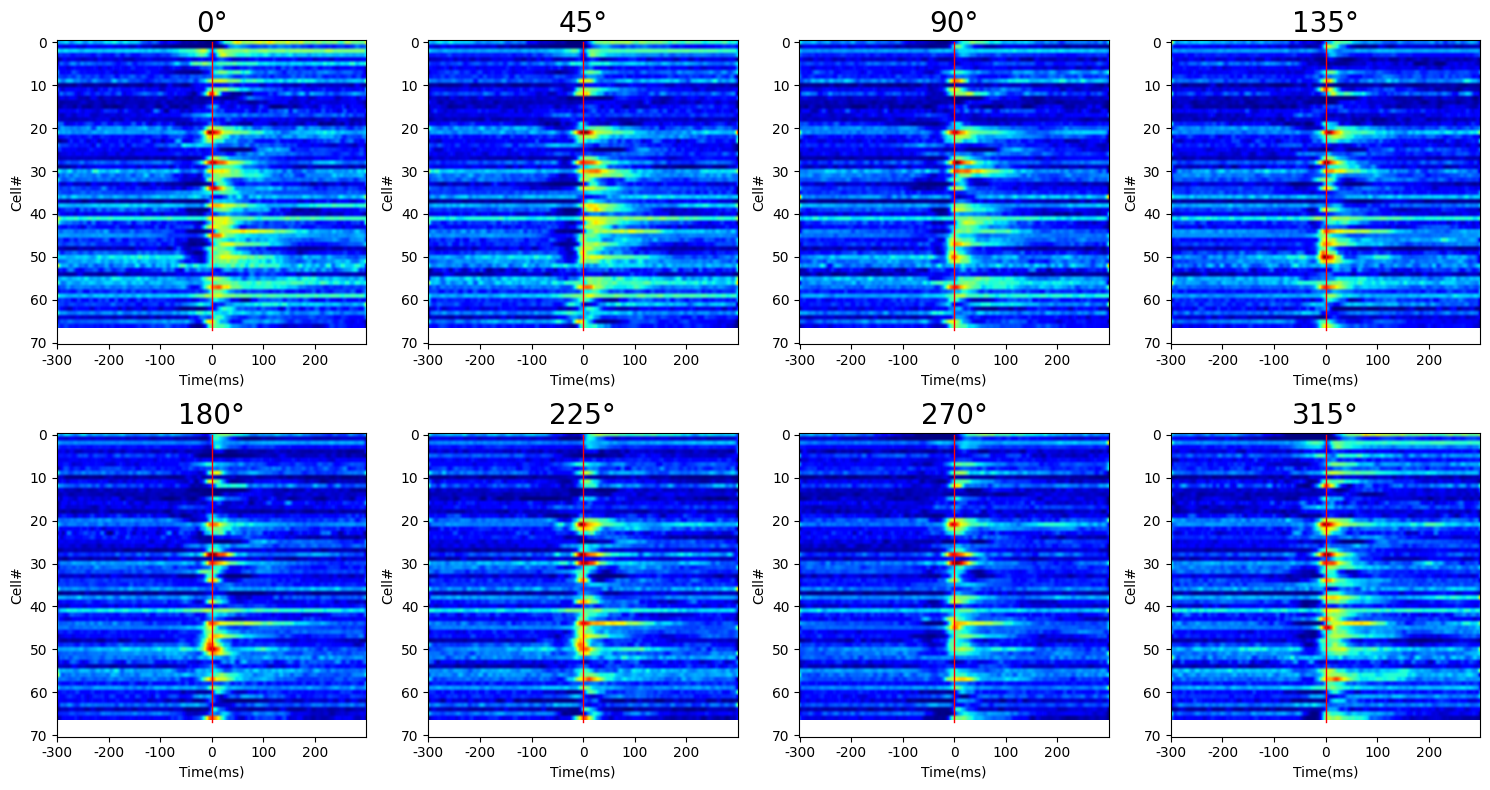

In [11]:
# Plotting raw data of each orientation
# label_ori = ['Up', 'Up right', 'Right', 'Down right',
#              'Down', 'Down left', 'Left', 'Up left']

import math

label_ori = []
for a in np.linspace(0, 360, 9):
    ss = math.trunc(a)
    temp = f'{ss}\N{DEGREE SIGN}'
    label_ori.append(temp)

label_ori = np.array(label_ori)

fig, axes = plt.subplots(2, 4, figsize=(15, 8))

c = 0
for a in range(8):
# for a in [2, 1, 0, 7, 6, 5, 4, 3]: # right to down right, anticlock-wise
    ax = axes[a // 4, a % 4]  # Determine the subplot location
    ax.imshow(data_cat_sm[a], aspect='auto', cmap='jet', origin='upper')  # Display the data
    ax.plot([300, 300], [0, len(data_cat_sm[0])], 'r', linewidth=1)  # Red vertical line
    ax.set_xticks(np.arange(0, 600, 100))  # Set X ticks
    ax.set_xticklabels(np.arange(-300, 300, 100))  # Set X tick labels
    # ax.set_title(label_ori[c])  # Set the title for each subplot
    ax.set_title(label_ori[c], size=20)  # Set the title for each subplot
    ax.set_ylabel("Cell#")  # Set Y-axis label
    ax.set_xlabel("Time(ms)")  # Set X-axis label
    c = c + 1

plt.tight_layout()

plt.savefig('raw.jpg', dpi=300)
plt.show()

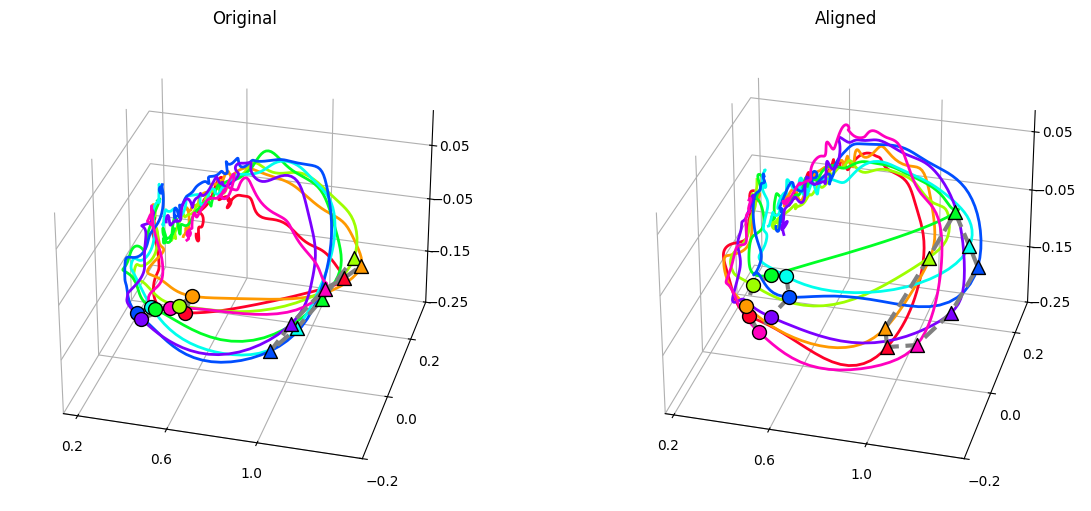

In [12]:
# Pretty figure

from matplotlib.markers import CARETUP
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# color map
cmap = matplotlib.colormaps.get_cmap("gist_rainbow")
C_list = cmap( np.linspace(0.0, 1.0, 8) ) # extract 20 colors from cmap

fig = plt.figure(constrained_layout=True,figsize=(12,5))
# subfigs = fig.subfigures(1, 2, wspace=0.07, width_ratios=[1, 1])

# 3D plot of angle original data

# subfigs[0].subplots(1, 1)
ax = fig.add_subplot(1, 2, 1, projection='3d')
for a in range(8):
    X = final_out2[a, 0]; Y = final_out2[a, 1]; Z = final_out2[a, 2]
    ax.plot(X[200:500], Y[200:500], Z[200:500], label='parametric curve', color = C_list[a], linewidth = 2)
    
    ax.scatter(X[280], Y[280], Z[280], s=100, color = C_list[a], facecolors=C_list[a], edgecolors='black')
    ax.scatter(X[300], Y[300], Z[300], marker='^', s=100, color = C_list[a], facecolors = C_list[a], edgecolors='black')
X = final_out2[:, 0]; Y = final_out2[:, 1]; Z = final_out2[:, 2]
ax.plot(np.hstack([X[:, 280], X[0, 280]]),
        np.hstack([Y[:, 280], Y[0, 280]]),
        np.hstack([Z[:, 280], Z[0, 280]]),
        ls = '--', color = [0.5, 0.5, 0.5], linewidth = 3)
ax.plot(np.hstack([X[:, 300], X[0, 300]]),
        np.hstack([Y[:, 300], Y[0, 300]]),
        np.hstack([Z[:, 300], Z[0, 300]]),
        ls = '--', color = [0.5, 0.5, 0.5], linewidth = 3)


ax.set_title("Original")
# ax.set_xlabel('1D'); ax.set_ylabel('2D'); ax.set_zlabel('3D')


# 3D plot of angle aligned data

# subfigs[0].subplots(1, 1)
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
for a in range(8):
    X = final_out[a, 0]; Y = final_out[a, 1]; Z = final_out[a, 2]
    ax2.plot(X[200:500], Y[200:500], Z[200:500], label='parametric curve', color = C_list[a], linewidth = 2)
    ax2.scatter(X[280], Y[280], Z[280], s=100, color = C_list[a], facecolors=C_list[a], edgecolors='black')
    ax2.scatter(X[300], Y[300], Z[300], marker='^', s=100, color = C_list[a], facecolors = C_list[a], edgecolors='black')
X = final_out[:, 0]; Y = final_out[:, 1]; Z = final_out[:, 2]
ax2.plot(np.hstack([X[:, 280], X[0, 280]]),
        np.hstack([Y[:, 280], Y[0, 280]]),
        np.hstack([Z[:, 280], Z[0, 280]]),
        ls = '--', color = [0.5, 0.5, 0.5], linewidth = 3)
ax2.plot(np.hstack([X[:, 300], X[0, 300]]),
        np.hstack([Y[:, 300], Y[0, 300]]),
        np.hstack([Z[:, 300], Z[0, 300]]),
        ls = '--', color = [0.5, 0.5, 0.5], linewidth = 3)


ax2.set_title("Aligned")
# ax2.set_xlabel('1D'); ax2.set_ylabel('2D'); ax2.set_zlabel('3D')
# ax.set_axis_off()
ax.set_xticks(np.arange(0.2 , 1.4, 0.4))
ax.set_yticks(np.arange(-0.2 , 0.3, 0.2))
ax.set_zticks(np.arange(-0.25 , 0.1, 0.1))
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# ax.grid(False)

# ax2.set_axis_off()
ax2.set_xticks(np.arange(0.2 , 1.4, 0.4))
ax2.set_yticks(np.arange(-0.2 , 0.3, 0.2))
ax2.set_zticks(np.arange(-0.25 , 0.1, 0.1))
ax2.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax2.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax2.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# ax2.grid(False)

# animation
def run(frame_number):
    ax.view_init(azim=225 + frame_number*2)
    ax2.view_init(azim=225 + frame_number*2)

# rotation figure
run(30)
# plt.legend(loc='lower right', bbox_to_anchor=(1, 1))
plt.savefig('3d plot.jpg', dpi=300)
plt.show()

# make animation
# anim = FuncAnimation(fig, run, frames=180, interval=20)
# HTML(anim.to_jshtml())
# anim.save('scatter.gif', writer='imagemagick', fps=25, dpi=80)




In [13]:
import roundness

X = final_out2[:, 0]; Y = final_out2[:, 1]; Z = final_out2[:, 2]
r_data = np.array([X[:, 280], Y[:, 280], Z[:, 280]]).T
r1 = roundness.roundness(r_data)

r_data = np.array([X[:, 300], Y[:, 300], Z[:, 300]]).T
r2 = roundness.roundness(r_data)

X = final_out[:, 0]; Y = final_out[:, 1]; Z = final_out[:, 2]
r_data = np.array([X[:, 280], Y[:, 280], Z[:, 280]]).T
r3 = roundness.roundness(r_data)

X = final_out[:, 0]; Y = final_out[:, 1]; Z = final_out[:, 2]
r_data = np.array([X[:, 300], Y[:, 300], Z[:, 300]]).T
r4 = roundness.roundness(r_data)

rr = np.round([r1, r2, r3, r4], 2)

In [14]:
rr

array([0.65, 0.56, 0.82, 0.79])

## Mossy_Purkinje cell

In [69]:
import numpy as np
import pandas as pd
from pandas import DataFrame as df
import matplotlib.pyplot as plt
import analysis_pca
from scipy import optimize

Ts = 1000
data_path = r'C:\Users\IBS\Desktop\python_code_N2'
save_path = r'C:\Users\IBS\Desktop\figures'

In [70]:
# Path to your Excel file
SOURCE_DATA_SF3 = 'SupplementaryFigure3.xlsx'

# Read specific sheet and ranges
mf = pd.read_excel(SOURCE_DATA_SF3, sheet_name='Figure S3b,c,d,f', usecols='A:HY', skiprows=2, nrows=502)
pc = pd.read_excel(SOURCE_DATA_SF3, sheet_name='Figure S3b,c,d,f', usecols='HZ:TP', skiprows=2, nrows=502)

In [71]:
# rate is ssc0, drate is wv0
lm_MF = {
    'rate': mf.iloc[:, 0:116].to_numpy().T,
    'drate': mf.iloc[:, 116:232].to_numpy().T,
    'v0': mf.iloc[0, 232],
    'label': 'MF'
}

lm_PC = {
    'rate': pc.iloc[:, 0:151].to_numpy().T,
    'drate': pc.iloc[:, 151:302].to_numpy().T,
    'v0': pc.iloc[0, 302],
    'label': 'PC'
}

In [72]:
# PCA analysis for mossy fibers

apca = analysis_pca.analysis_pca(Ts, lm_MF["rate"], save_path)
PCA_total_MP = apca.pca_analy(lm_MF["rate"])

# plt.plot(PCA_total_MP['p'].T[0],PCA_total_MP['p'].T[1])

# PCA analysis for perkinje cells

apca = analysis_pca.analysis_pca(Ts, lm_PC["rate"], save_path)
PCA_total_PC = apca.pca_analy(lm_PC["rate"])

# plt.plot(PCA_total_PC['p'].T[0],PCA_total_PC['p'].T[1])

#For FN PCA

import pre_processing

ppss = pre_processing.pre_processing(Ts, data_path, save_path)
[final_cat, data_cat, val_cat, dur_cat, rejectedXY_cat] = ppss.datasorting_orientation(1)

apca = analysis_pca.analysis_pca(Ts, data_cat, save_path)
data_cat_sm = apca.smoothing_data()
PCA_total = apca.pca_analy(data_cat_sm)

Dimensions: 1, Variance explained: 75.03%
Dimensions: 2, Variance explained: 87.63%
Dimensions: 3, Variance explained: 93.15%
Dimensions: 4, Variance explained: 95.70%
Dimensions: 5, Variance explained: 97.19%
Dimensions to be reduced: 2
Dimensions: 1, Variance explained: 51.04%
Dimensions: 2, Variance explained: 76.08%
Dimensions: 3, Variance explained: 85.97%
Dimensions: 4, Variance explained: 92.26%
Dimensions: 5, Variance explained: 94.65%
Dimensions to be reduced: 4
Dimensions: 1, Variance explained: 57.01%
Dimensions: 2, Variance explained: 76.14%
Dimensions: 3, Variance explained: 82.16%
Dimensions: 4, Variance explained: 86.65%
Dimensions: 5, Variance explained: 89.17%
Dimensions to be reduced: 5
Dimensions: 1, Variance explained: 64.05%
Dimensions: 2, Variance explained: 78.73%
Dimensions: 3, Variance explained: 83.99%
Dimensions: 4, Variance explained: 87.57%
Dimensions: 5, Variance explained: 90.69%
Dimensions to be reduced: 4
Dimensions: 1, Variance explained: 65.68%
Dimens

In [73]:
pca_data = []
for pc in range(4):
    for a in range(8):
        temp = PCA_total[a]['p'].T
        temp = temp[pc]
        pca_data.append(temp)
pca_data = np.array(pca_data)

In [74]:
pFN = pca_data[:,50:550]

pMP = PCA_total_MP['p']
pMP = pMP[:500, :2]

pPC = PCA_total_PC['p']
pPC = pPC[:500, :4]

pMPC = np.hstack((-pPC, pMP))
pMPC2 = np.hstack((pPC, pMP))

In [75]:
# # beta extract from nnls

# betas = []
# r_2 = []
# for a in range(len(pFN)):
#     beta, resid = optimize.nnls(pMPC, pFN[a])
#     resid2 = resid ** 2
#     r_s = 1 - resid2 / (pFN[a].size * pFN[a].var())
#     betas.append(beta)
#     r_2.append(r_s)

# betas = np.array(betas)
# betas[:,:4] = betas[:,:4] * -1

In [76]:
# beta

betas = []
r_2 = []
for a in range(len(pFN)):
    beta, resid = np.linalg.lstsq(pMPC2, pFN[a], rcond=None)[:2]
    resid = np.linalg.norm(pMPC2 @ beta - pFN[a])**2
    r_s = 1 - resid / (pFN[a].size * pFN[a].var())
    betas.append(beta)
    r_2.append(r_s)

betas = np.array(betas)
r_2 = np.array(r_2)

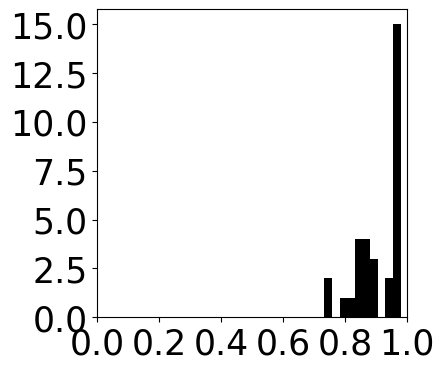

In [77]:
plt.figure(figsize=(4,4))

plt.hist(r_2, color='k')
plt.xlim(0, 1)

plt.yticks(fontsize=25)
plt.xticks(fontsize=25)

plt.savefig('hist_pca.jpg', bbox_inches = 'tight', dpi=300)

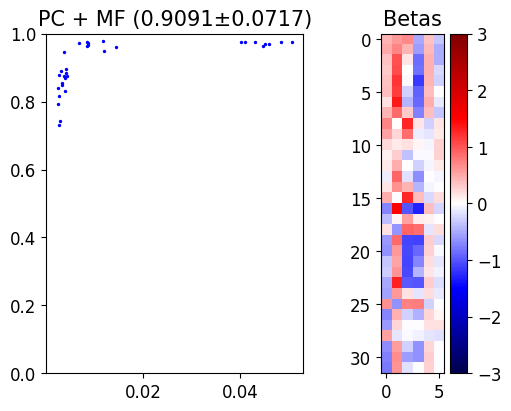

In [78]:
fig = plt.figure(constrained_layout=True,figsize=(5,4))
subfigs = fig.subfigures(1, 2, wspace=0.07, width_ratios=[5, 3])

plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

mr = round(np.mean(r_2), 4); stdr = round(np.std(r_2), 4)

subfigs[0].subplots(1, 1)
plt.scatter(pFN.var(axis=1), r_2, 2,'b')
plt.title(f'PC + MF ({mr}\u00B1{stdr})', fontsize=15)
plt.ylim(0, 1)

subfigs[1].subplots(1, 1)
plt.imshow(betas, cmap='seismic', origin='upper')
plt.title('Betas', fontsize=15)
plt.clim(-3, 3)
plt.colorbar()

plt.savefig('pca_r_2.jpg', dpi=300)

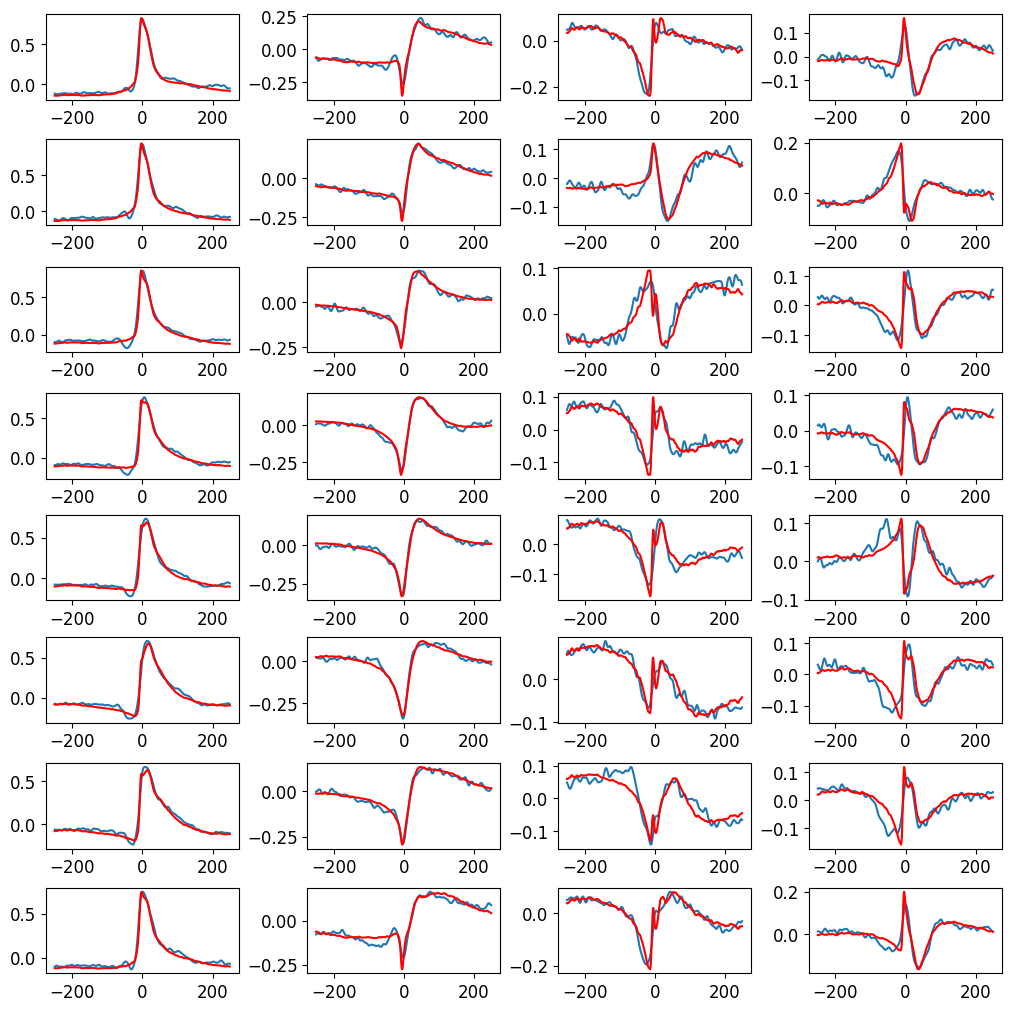

In [79]:
order_list = np.concat([np.arange(0,32,4), np.arange(0,32,4)+1, np.arange(0,32,4)+2, np.arange(0,32,4)+3]) + 1
fig = plt.figure(constrained_layout=True,figsize=(10,10))

t = np.arange(-250,250)
for a in range(32):
    ax = fig.add_subplot(8, 4, order_list[a])
    ax.plot(t, pFN[a], t, pMPC2 @ betas[a], 'r')
plt.savefig('fitting.jpg', dpi=300)

## Raw data analysis for MF and PC

In [80]:
# preprocessing

data_mf = lm_MF['rate']
data_pc = lm_PC['rate']

data_fn = np.array(np.concatenate(data_cat_sm, axis = 0))
pFN = data_fn[:,50:550]

pMP = data_mf[:, :500]
pPC = data_pc[:, :500]

pMPC = np.vstack((-pPC, pMP)) # put minus beacuse PC is inhibitory neuron
pMPC = pMPC.T
pMPC2 = np.vstack((pPC, pMP))
pMPC2 = pMPC2.T

In [81]:
# Make MF positive beta , PC beta negative

for type in range(3):

    if type == 1:
        pMPC = pPC.T
    elif type == 2:
        pMPC = pMP.T
    
    betas_pn = []
    r_2_pn = []
    resid_t = []
    for a in range(len(pFN)):
        pFN[a] = pFN[a] - np.mean(pFN[a][:100])
        # pFN[a] = pFN[a] - np.mean(pFN[a])
        beta, resid = optimize.nnls(pMPC, pFN[a])
        resid2 = resid **2
        r_s = 1 - resid2 / (pFN[a].size * pFN[a].var())
        betas_pn.append(beta)
        r_2_pn.append(r_s)
        resid_t.append(resid)
    
    if pMPC.shape[1] == pMP.shape[0]:
        betas_pn2 = np.array(betas_pn)
        r_2_pn2 = np.array(r_2_pn)
        resid_t2 = np.array(resid_t)
    elif pMPC.shape[1] == pPC.shape[0]:
        betas_pn3 = np.array(betas_pn) * -1
        r_2_pn3 = np.array(r_2_pn)
        resid_t3 = np.array(resid_t)
    else:
        betas_pn1 = np.array(betas_pn)
        # betas_pn1[:, :pPC.shape[0]] = betas_pn1[:, :pPC.shape[0]] * -1
        r_2_pn1 = np.array(r_2_pn)
        resid_t1 = np.array(resid_t)

betas_pn1[:, :pPC.shape[0]] = betas_pn1[:, :pPC.shape[0]] * -1

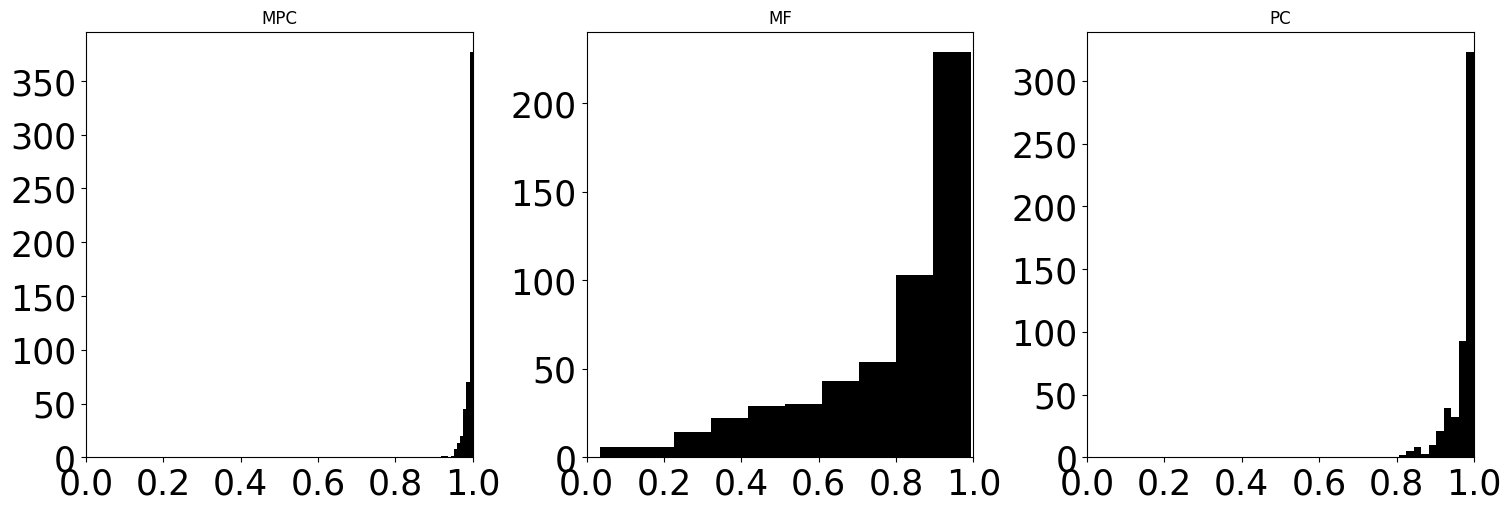

In [82]:
fig = plt.figure(constrained_layout=True,figsize=(15,5))

ax = fig.add_subplot(1, 3, 1)
ax.hist(r_2_pn1, color='k')
ax.set_title('MPC')
ax.set_xlim(0, 1)

plt.yticks(fontsize=25)
plt.xticks(fontsize=25)

ax = fig.add_subplot(1, 3, 2)
ax.hist(r_2_pn2, color='k')
ax.set_title('MF')
ax.set_xlim(0, 1)

plt.yticks(fontsize=25)
plt.xticks(fontsize=25)

ax = fig.add_subplot(1, 3, 3)
ax.hist(r_2_pn3, color='k')
ax.set_title('PC')
ax.set_xlim(0, 1)

plt.yticks(fontsize=25)
plt.xticks(fontsize=25)

plt.savefig('hist.jpg', dpi=300)

In [83]:
mr1 = round(np.mean(r_2_pn1), 4)
mr2 = round(np.mean(r_2_pn2), 4)
mr3 = round(np.mean(r_2_pn3), 4)

stdr1 = round(np.std(r_2_pn1), 4)
stdr2 = round(np.std(r_2_pn2), 4)
stdr3 = round(np.std(r_2_pn3), 4)

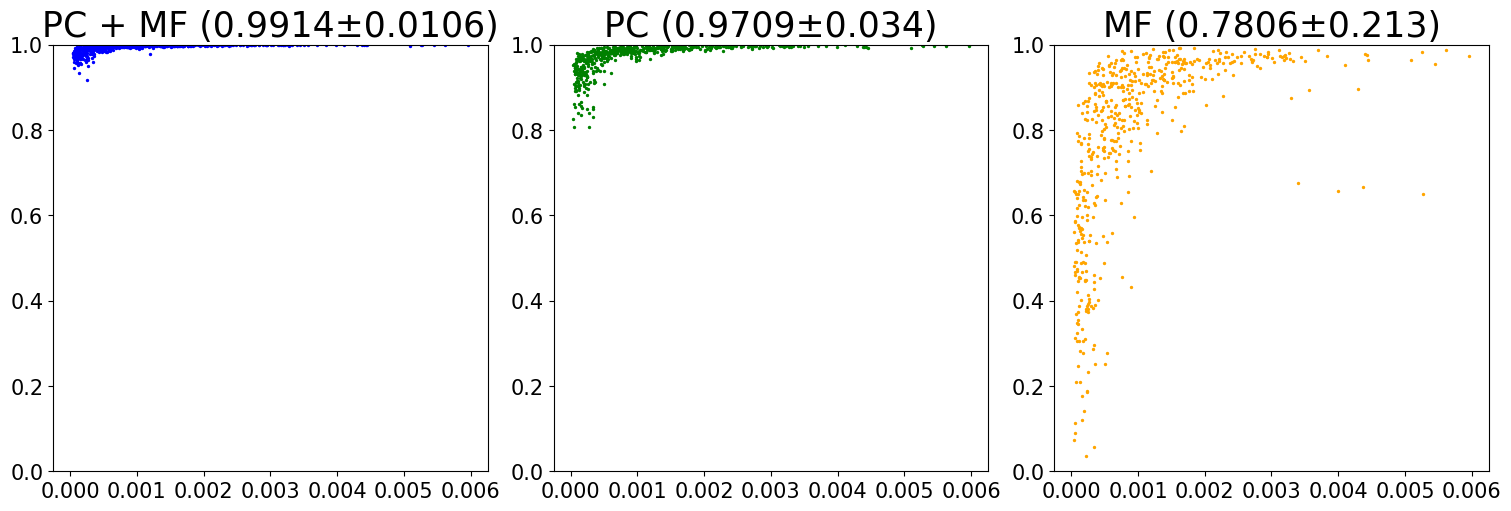

In [84]:
fig = plt.figure(constrained_layout=True,figsize=(15,5))

ax = fig.add_subplot(1, 3, 1)
ax.scatter(pFN.var(axis=1), r_2_pn1, 2,'b')
ax.set_title(f'PC + MF ({mr1}\u00B1{stdr1})', fontsize=25)
ax.set_ylim(0, 1)

plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

ax = fig.add_subplot(1, 3, 3)
ax.scatter(pFN.var(axis=1), r_2_pn2, 2, 'orange')
ax.set_title(f'MF ({mr2}\u00B1{stdr2})', fontsize=25)
ax.set_ylim(0, 1)

plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

ax = fig.add_subplot(1, 3, 2)
ax.scatter(pFN.var(axis=1), r_2_pn3, 2, 'g')
ax.set_title(f'PC ({mr3}\u00B1{stdr3})', fontsize=25)
ax.set_ylim(0, 1)

plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

plt.savefig('r_2.jpg', bbox_inches = 'tight', dpi=300)

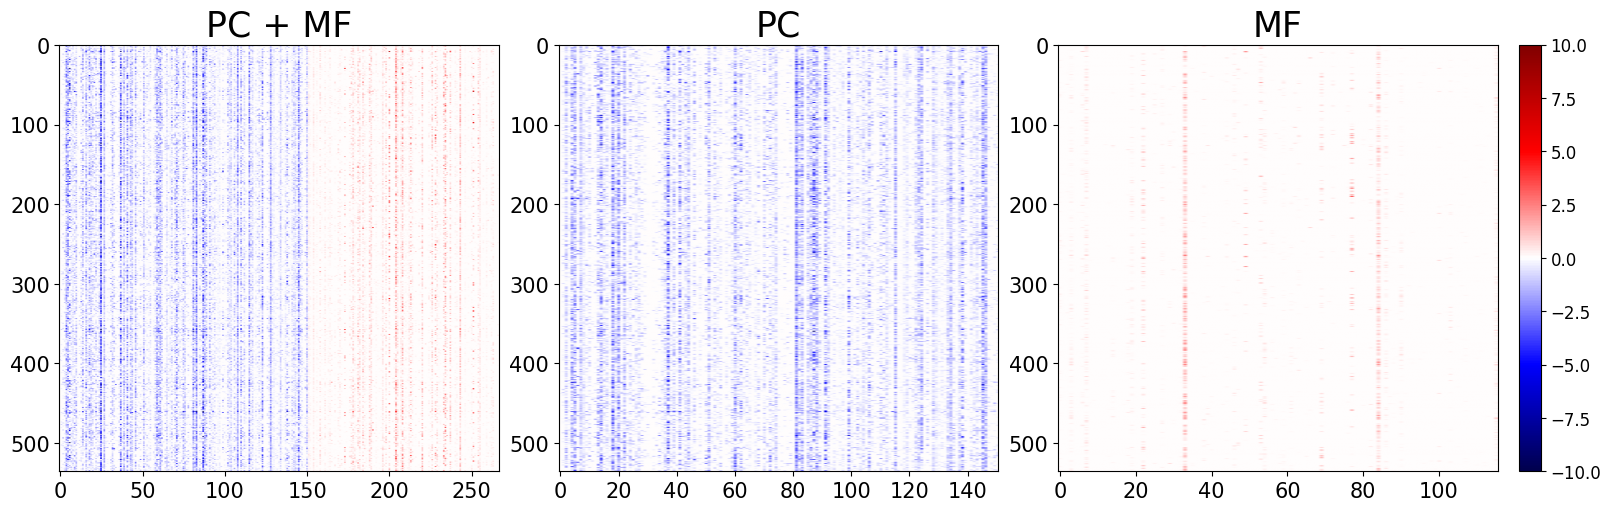

In [85]:
fig = plt.figure(constrained_layout=True,figsize=(16,5))

ax1 = fig.add_subplot(1, 3, 1)
fig1 = ax1.imshow(betas_pn1, aspect='auto', cmap='seismic', origin='upper')
ax1.set_title('PC + MF', fontsize=25)
fig1.set_clim(-10, 10)

plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

ax2 = fig.add_subplot(1, 3, 3)
fig2 = ax2.imshow(betas_pn2, aspect='auto', cmap='seismic', origin='upper')
ax2.set_title('MF', fontsize=25)
fig2.set_clim(-10, 10)

plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

ax3 = fig.add_subplot(1, 3, 2)
fig3 = ax3.imshow(betas_pn3, aspect='auto', cmap='seismic', origin='upper')
ax3.set_title('PC', fontsize=25)
fig3.set_clim(-10, 10)

plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
fig.colorbar(fig2)

plt.savefig('beta.jpg', bbox_inches = 'tight', dpi=300)

## RRR for MF and PC

In [86]:
pFN2 = pFN - np.mean(pFN[:,:100], axis = 1)[:, None]

U, S, Vt = np.linalg.svd(pMPC2 @ betas_pn1.T)

rmse_t = []
for rank in range(Vt.shape[1]):
    V = Vt[:rank,:]
    rmse = np.mean((pMPC2 @ betas_pn1.T @ V.T @ V - pFN2.T) ** 2)
    rmse_t.append(rmse)

rmse_t = np.array(rmse_t)

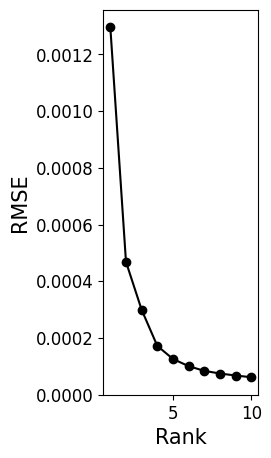

In [87]:
# plt.semilogy(rmse_t[:10], 'o-')
a = 10

plt.figure(figsize = (2,5))
plt.plot(np.arange(1,a+1,1), rmse_t[:a], 'o-', color = 'k')
plt.xlabel('Rank', fontsize=15)
plt.ylabel('RMSE', fontsize=15)
# plt.ylim(0,0.007)

plt.savefig('rmse.jpg', bbox_inches = 'tight', dpi=300)

In [88]:
rank = 100

V = Vt[:rank,:]
prefn = (pMPC2 @ betas_pn1.T @ V.T @ V).T

prefn2 = np.reshape(prefn, (8,67,500))
avpfn = np.mean(prefn2, axis=0) # angle average

In [89]:
import analysis_pca

Ts = 1000
data_path = r'C:\Users\IBS\Desktop\python_code_N2'
save_path = r'C:\Users\IBS\Desktop\figures'

apca = analysis_pca.analysis_pca(Ts, avpfn, save_path)
# data_cat_sm = apca.smoothing_data()  # Smoothed data
# data = np.mean(avpfn, axis=0)  # Anagle averged data
PCA_total = apca.pca_analy(avpfn)  # PCA

Dimensions: 1, Variance explained: 76.22%
Dimensions: 2, Variance explained: 86.46%
Dimensions: 3, Variance explained: 91.31%
Dimensions: 4, Variance explained: 94.85%
Dimensions: 5, Variance explained: 96.82%
Dimensions to be reduced: 3


In [90]:
# plt.plot(prefn2[:, 0, :].T)

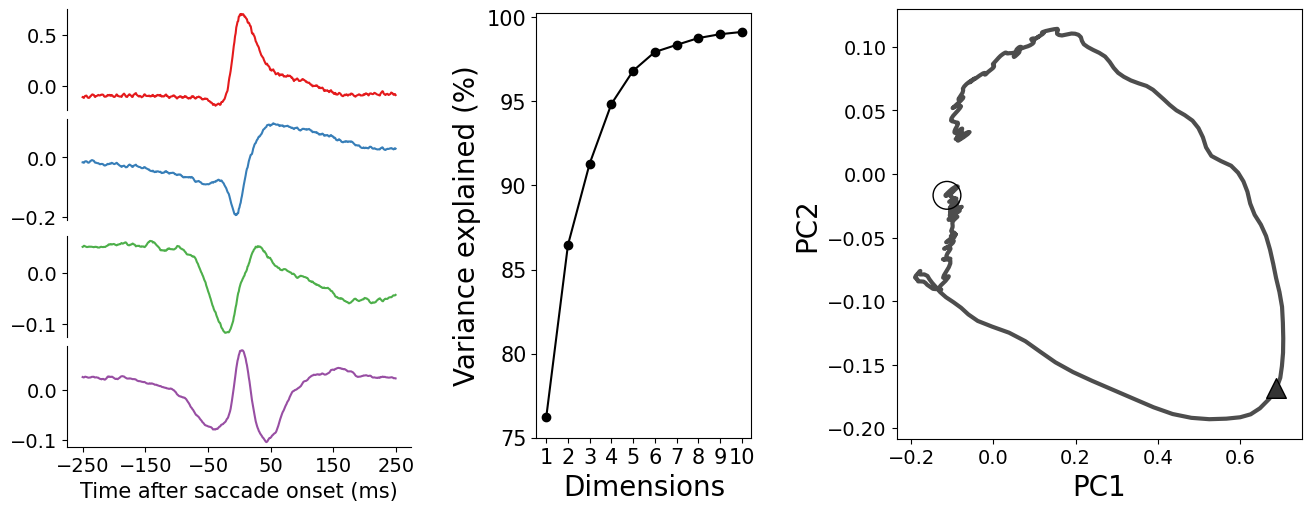

In [91]:
# Pretty figures
# from matplotlib.markers import CARETUP
import matplotlib

cmap = matplotlib.colormaps.get_cmap("Set1")
C_list = cmap( np.linspace(0.0, 1.0, 8) ) # extract 20 colors from cmap

fig = plt.figure(constrained_layout=True,figsize=(13,5))
subfigs = fig.subfigures(1, 3, wspace=0.07, width_ratios=[4, 3, 5])

plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)

# Plot variance explained
subfigs[1].subplots(1, 1)
dd = PCA_total['dd']
var_explained = np.cumsum(dd) * 100
plt.plot(np.arange(1,11, 1), var_explained[:10], 'o-', color='black')
plt.xlabel('Dimensions', fontsize=20)
plt.ylabel('Variance explained (%)', fontsize=20)
plt.xticks(np.arange(1, 11, step=1), fontsize=15)
plt.yticks(np.arange(75, 101, step=5), fontsize=15)
# plt.title('Variance Explained')

# plt.savefig('var_ex.jpg', dpi=300)
# plt.show()

# plt.savefig('var_ex.jpg', dpi=300)
# plt.show()


# Plot dPCA
subfigs[2].subplots(1, 1)

from scipy.ndimage import gaussian_filter1d

win = 1 # timewindow (ms), if sampling rate is 1000hz, win=10 is 10ms
 
temp_PC2 = PCA_total['p'].T

s_temp1 = gaussian_filter1d(temp_PC2[0], win)
s_temp2 = gaussian_filter1d(temp_PC2[1], win)
s_temp3 = gaussian_filter1d(temp_PC2[2], win)

X = s_temp1[0:500]
Y = s_temp2[0:500]
Z = s_temp3[0:500]

# plt.scatter(X, Y, s=10, color = [0, 0, 0], marker='o')
plt.plot(X, Y, linewidth=3.0, color = [0.3, 0.3, 0.3])
plt.scatter(X[0], Y[0], s=400, color = [0, 0, 0], facecolors='none', zorder=3)
plt.scatter(X[250], Y[250], marker='^', s=200, color = [0, 0, 0], facecolor = [0.2, 0.2, 0.2], zorder=3)
plt.xlabel('PC1', fontsize=20)
plt.ylabel('PC2', fontsize=20)



# plt.rc('font', size=25)

# Plot the principal component time series (scores)
subfigs[0].subplots(4, 1)

for i in range(4):  # Plot the first 4 components or up to nmode
    ax = plt.subplot(4, 1, i + 1)
    ax.plot(np.arange(-250, 250), temp_PC2[i, :500], color = C_list[i])  # Assuming 600 time steps
    # ax.set_title(f'dPC {i + 1}')
    ax.axis('on')
    ax.get_xaxis().set_ticks([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    if i == 3:
        ax.spines['bottom'].set_visible(True)
        ax.get_xaxis().set_ticks(np.arange(-250,256,100))
plt.xlabel('Time after saccade onset (ms)', fontsize=15)
# fig.text(-0.03, 0.55, 'dPCs', 
#                 ha='center', 
#                 va='center', 
#                 rotation='vertical', 
#                 fontsize=15)

plt.savefig('pc_mfNpc.jpg', dpi=300)

In [93]:
#For FN PCA

import pre_processing

ppss = pre_processing.pre_processing(Ts, data_path, save_path)
[final_cat, data_cat, val_cat, dur_cat, rejectedXY_cat] = ppss.datasorting_orientation(1)

apca = analysis_pca.analysis_pca(Ts, data_cat, save_path)
data_cat_sm = apca.smoothing_data()
PCA_t = apca.pca_analy(data_cat_sm)


# PCA to PCA

PCA_total2 = apca.pca_to_pca(PCA_t, 4)

Dimensions: 1, Variance explained: 57.01%
Dimensions: 2, Variance explained: 76.14%
Dimensions: 3, Variance explained: 82.16%
Dimensions: 4, Variance explained: 86.65%
Dimensions: 5, Variance explained: 89.17%
Dimensions to be reduced: 5
Dimensions: 1, Variance explained: 64.05%
Dimensions: 2, Variance explained: 78.73%
Dimensions: 3, Variance explained: 83.99%
Dimensions: 4, Variance explained: 87.57%
Dimensions: 5, Variance explained: 90.69%
Dimensions to be reduced: 4
Dimensions: 1, Variance explained: 65.68%
Dimensions: 2, Variance explained: 75.64%
Dimensions: 3, Variance explained: 80.99%
Dimensions: 4, Variance explained: 85.31%
Dimensions: 5, Variance explained: 88.71%
Dimensions to be reduced: 5
Dimensions: 1, Variance explained: 63.94%
Dimensions: 2, Variance explained: 75.89%
Dimensions: 3, Variance explained: 81.82%
Dimensions: 4, Variance explained: 85.62%
Dimensions: 5, Variance explained: 88.53%
Dimensions to be reduced: 5
Dimensions: 1, Variance explained: 64.24%
Dimens

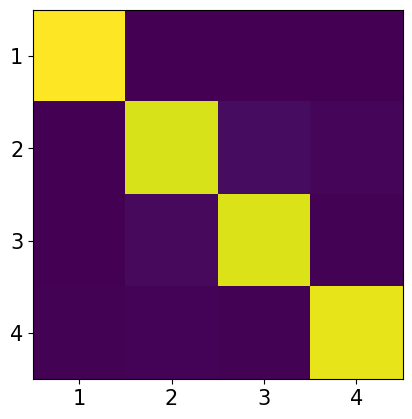

In [100]:
app = PCA_total['p'].T
dpp = PCA_total2['p'].T
dpp = dpp[:, 50:550]

p = np.corrcoef(dpp[:4], app[:4]) ** 2
plt.imshow(p[:4,4:], cmap='viridis')
plt.xticks(np.arange(0,4,1), np.arange(1,5,1), fontsize=15)
plt.yticks(np.arange(0,4,1), np.arange(1,5,1), fontsize=15)
plt.clim(0,1)
# plt.colorbar()

plt.savefig('dp_mfp.jpg', dpi=300)